First of all, a few notes:
* Check the first homework for a quick reminder on general rules.
* As before, no code hints. We trust your skills (if in doubt - check the seminar notebook).

Remember to submit the feedback! Especially if the homework was too difficult or easy for you.

# Introduction [1.0]




## scRNA-seq

We **must** know our data before doing the analysis. To ease your life, [here](https://www.singlecellcourse.org/introduction-to-single-cell-rna-seq.html) is an excellent state-of-the-art description of the scRNA-seq experiments. Read it and answer the following questions:

* [0.2] What is single-cell RNA-seq and how does it compare to bulk RNA-seq?

→ Single-cell RNA-seq - технология, основанная на секвенировании транскриптов отдельных клеток.

→ Bulk RNA-seq - технология, с помощью которой производится секвенирование РНК в группах клеток (тканях).

→ scRNA-seq позволяет оценить разнородность экспресии генов в разных клетках, в то время как bulk RNA-seq позволяет оценить изменение экспресии генов в ткани или в организме, в целом.

* [0.2] What are some of the typical applications of scRNA-seq?

→ Distinguishing different cell types (Stem cell differentiation)

→ Embryogenesis (Это вообще очень интересная тема про развитие эмбриона. Организм развивается с одной клетки, которая далее делится, образуются зародышевые листки, ткани, затем ораганы. Очень интересно изучать дифференциальную экспрессию генов на всех этапах эмбриогенеза)

→ Whole-tissue analysis

→ Single-cell RNA-seq for whole-organism studies

→ Disease biology and treatment (например, можно изучать "больные" клетки, такие как раковые).


* [0.2] What experimental design choices should be considered in scRNA-seq?

→ Step 1: Generate a single-cell suspension (суспензия из отдельных клеток, ткань сильно измельчают, пропускают через микрофильтры)

→ Step 2: Isolate the cells (клетки сепарируют с помощью Flow Cytometer (FACS) machine или с помощью microfluidics)

→ Step 3: Cell barcoding and amplification (The individual cells are barcoded so they can be identified and amplified so that the RNA can be sequenced)

→ Step 4: NGS library preparation and sequencing (после создания библиотеки клетки секвенируются)

→ Step 5: Data analysis (с помощью специально обученных пайплайнов или ручками)



* [0.2] What are some of the challenges of scRNA-seq data compared to bulk data?

→ Шум в данных из-за того, что в одиночной клетке мало генетического материала, и возникают технические трудности секвенирования (могут возникнуть)

→ Малые кластеры клеток (редкие популяции) могут быть не обнаружены, так как таких клеток просто будет мало.

→ Проблема с тем, что низкоэкспрессируемые гены могут не быть обнаружены, так как очень мало соответствующих РНК в клетке.

→ Могут секвенироваться несколько клеток одновременно (например, две).

→ Как и при любом эксперименте возможно загрязение чужеродной РНК, но тут это будет критичнее, так как изначальный объем РНК для секвенирвания в одной клетоке гораздо меньше, чем в кусочке ткани.

→ Это дорого.

## Target experiment

To move on, you need to find/choose and download your favorite scRNA-seq dataset. Similar to what we did during the workshop, but everyone will have their own data to make it more fun.

See, for example, public [10x datasets](https://www.10xgenomics.com/resources/datasets?menu%5Bproducts.name%5D=Single%20Cell%20Gene%20Expression&query=&page=1&configure%5Bfacets%5D%5B0%5D=chemistryVersionAndThroughput&configure%5Bfacets%5D%5B1%5D=pipeline.version&configure%5BhitsPerPage%5D=50&configure%5BmaxValuesPerFacet%5D=1000&refinementList%5Bproduct.name%5D%5B0%5D=Single%20Cell%20Gene%20Expression) or [GEO](https://www.ncbi.nlm.nih.gov/gds/?term=scRNA-seq). Subsample cells or use more strict thresholds if the computations are too long.

[0.2] Please provide a brief description of the chosen dataset. I.e., what was the purpose of the original study, what is the protocol, and so on. Insert link to the dataset.

**Note**: To avoid a situation where multiple students have selected the same dataset, write the name of the dataset and attach a link to it in [this google sheet](https://docs.google.com/spreadsheets/d/1iJ0SJyYbmq38AIBNg723iyRE-aYfO0SfujpEw2hm3kg/edit?usp=sharing). This is not mandatory, and is only needed to ensure that some other student will not accidentaly pick the same dataset.

→ Name:
> Whole Blood RBC Lysis for PBMCs and Neutrophils, Granulocytes, 3'

→ Link to the dataset: https://www.10xgenomics.com/resources/datasets/whole-blood-rbc-lysis-for-pbmcs-neutrophils-granulocytes-3-3-1-standard

→ Brief description of the dataset:

> Donor Information: healthy female.

→ Protocol:

> Isolation protocol: CG000392 RevA: Isolation of Leukocytes, Bone Marrow and Peripheral Blood Mononuclear Cells for Single Cell RNA Sequencing - Whole Blood Lysis for Granuloctyes track.

> Sequencing instrument: Illumina NovaSeq 6000


→ Cells nuclei count:

> 8,000

→ Purpose of the original study:

> Иммунологические исследования.

# Main flow [7.5]

Simple and tedious, you need to repeat the seminar results with your data and implement some algorithms by hand.

#### [2.5] Repeat the main workflow: load & preprocess the data -> calculate PCA, UMAP, t-SNE -> color cells using K-means / Agg. Clustering / Leiden algorithms.

##### **Step 1. Download and Unpack Data**

In [ ]:
# download
!wget https://cf.10xgenomics.com/samples/cell-exp/6.1.0/WB_Lysis_Granulocytes_3p_Introns_8kCells/WB_Lysis_Granulocytes_3p_Introns_8kCells_filtered_feature_bc_matrix.tar.gz

--2024-12-18 20:09:19--  https://cf.10xgenomics.com/samples/cell-exp/6.1.0/WB_Lysis_Granulocytes_3p_Introns_8kCells/WB_Lysis_Granulocytes_3p_Introns_8kCells_filtered_feature_bc_matrix.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:1ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16987660 (16M) [application/x-tar]
Saving to: ‘WB_Lysis_Granulocytes_3p_Introns_8kCells_filtered_feature_bc_matrix.tar.gz’

WB_Lysis_Granulocyt 100%[===================>]  16.20M  15.2MB/s    in 1.1s    

2024-12-18 20:09:22 (15.2 MB/s) - ‘WB_Lysis_Granulocytes_3p_Introns_8kCells_filtered_feature_bc_matrix.tar.gz’ saved [16987660/16987660]



In [ ]:
# unpack
!tar -xzf /content/WB_Lysis_Granulocytes_3p_Introns_8kCells_filtered_feature_bc_matrix.tar.gz

In [ ]:
# look
!ls filtered_feature_bc_matrix

barcodes.tsv.gz  features.tsv.gz  matrix.mtx.gz


##### **Step 2. Install Packages & Load the Data**

In [ ]:
# install scanpy
!python3 -m pip uninstall -y matplotlib
!python3 -m pip install matplotlib==3.6.3 scanpy

Found existing installation: matplotlib 3.8.0
Uninstalling matplotlib-3.8.0:
  Successfully uninstalled matplotlib-3.8.0
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.1/50.1 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.6/83.6 kB 8.0 MB/s eta 0:00:00
  Created wheel for session-info: filename=session_info-1.0.0-py3-none-any.whl size=8023 sha256=c650db4e4eb80c211700ae804947313cf414467b7a75093c20f154673e1d584d
  Stored in directory: /root/.cache/pip/wheels/6a/aa/b9/eb5d4031476ec10802795b97ccf937b9bd998d68a9b268765a
Successfully built se

In [ ]:
import scanpy as sc

# verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.verbosity = 3

adata = sc.read_10x_mtx(
    '/content/filtered_feature_bc_matrix',  # the directory with the `.mtx` file
    var_names='gene_symbols',      # use gene symbols for the variable names (variables-axis index)
    cache=True                     # write a cache file for faster subsequent reading
)
# Make all gene names unique (symbols MUST be unique by but in reality...)
adata.var_names_make_unique()

adata

... writing an h5ad cache file to speedup reading next time


AnnData object with n_obs × n_vars = 8000 × 36601
    var: 'gene_ids', 'feature_types'

In [ ]:
adata.n_obs # number of oserbations (= number of cells)

8000

In [ ]:
adata.obs # read in letters - number of reads

Empty DataFrame
Columns: []
Index: [AAACCCAAGGCACTCC-1, AAACCCACAACTCCCT-1, AAACCCAGTACGAGCA-1, AAACCCAGTTGTGCAT-1, AAACCCATCTTCGGAA-1, AAACGAAAGAACTTCC-1, AAACGAACAATTGCGT-1, AAACGAACACCGGAAA-1, AAACGAACAGATTTCG-1, AAACGAAGTTGTGGCC-1, AAACGCTAGACAACTA-1, AAACGCTAGGTCACAG-1, AAACGCTAGTAACAGT-1, AAACGCTCACCATAAC-1, AAACGCTCACTGGATT-1, AAACGCTTCGAGTCCG-1, AAAGAACAGCAGCCCT-1, AAAGAACAGCGACTAG-1, AAAGAACAGGGAGGCA-1, AAAGAACAGTCGAGGT-1, AAAGAACCAACCGTGC-1, AAAGAACCACTGCACG-1, AAAGAACCAGTGCGCT-1, AAAGAACGTCCTGTCT-1, AAAGAACTCAGCATCG-1, AAAGAACTCAGCTCTC-1, AAAGAACTCCCGTGTT-1, AAAGAACTCCGCATAA-1, AAAGAACTCGACATCG-1, AAAGAACTCGGCATCG-1, AAAGGATAGGAGCTGT-1, AAAGGATCACCCAAGC-1, AAAGGATCACGCGCAT-1, AAAGGATCAGCTGTAT-1, AAAGGATCAGCTTCCT-1, AAAGGATCAGGAATAT-1, AAAGGATGTATCGTTG-1, AAAGGATTCGACCAAT-1, AAAGGATTCGCAGATT-1, AAAGGGCCAGATGCGA-1, AAAGGGCGTACGAGTG-1, AAAGGGCGTCGATTTG-1, AAAGGGCGTGAATGAT-1, AAAGGGCGTTCAAGTC-1, AAAGGGCTCATTCATC-1, AAAGGGCTCGACCCAG-1, AAAGGGCTCTACCACC-1, AAAGGTAAGACGGTTG-1, AAAGGTAAGATTCGCT-1, AAAGGTAAGTGATCGG-1, AAAGGTACAAAGCAAT-1, AAAGGTACAAGTGGCA-1, AAAGGTACACAGCCTG-1, AAAGGTACATACAGAA-1, AAAGGTACATACAGGG-1, AAAGGTAGTCGAGATG-1, AAAGGTATCATGTCAG-1, AAAGGTATCCAAGCAT-1, AAAGGTATCGCAAGAG-1, AAAGGTATCTAAGCGT-1, AAAGTCCAGCACCGTC-1, AAAGTCCAGTAGGCCA-1, AAAGTCCGTACGGATG-1, AAAGTCCGTATCTCTT-1, AAAGTCCGTTCTCTAT-1, AAAGTCCTCGACACTA-1, AAAGTCCTCTACTGCC-1, AAAGTCCTCTGAGAAA-1, AAAGTCCTCTTAGCCC-1, AAAGTGAAGCGTTAGG-1, AAAGTGACACAAACGG-1, AAAGTGACAGACCAGA-1, AAAGTGAGTATCCCAA-1, AAAGTGAGTATCGCAT-1, AAAGTGAGTTCTAAGC-1, AAAGTGATCAAATAGG-1, AAAGTGATCGCCGAGT-1, AAAGTGATCTACGCAA-1, AAAGTGATCTTCGCTG-1, AAATGGAAGTCCTACA-1, AAATGGAGTACCAATC-1, AAATGGAGTAGTCACT-1, AAATGGAGTATCAAGA-1, AAATGGATCACCGGTG-1, AAATGGATCATCACAG-1, AACAAAGAGAACAAGG-1, AACAAAGCAATGTCAC-1, AACAAAGCAGTAACGG-1, AACAAAGGTCACTCGG-1, AACAAAGGTCCTATAG-1, AACAAAGTCCTCGATC-1, AACAAAGTCTGCCTGT-1, AACAACCCAGAGGCTA-1, AACAACCGTGTCACAT-1, AACAACCTCACAACCA-1, AACAACCTCATCGACA-1, AACAACCTCATGGCCG-1, AACAACCTCCCGAGGT-1, AACAACCTCCTCTCTT-1, AACAACCTCGACCTAA-1, ...]

[8000 rows x 0 columns]

In [ ]:
adata.var_names # gene names

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.5', 'AL627309.4', 'AP006222.2', 'AL732372.1',
       ...
       'AC133551.1', 'AC136612.1', 'AC136616.1', 'AC136616.3', 'AC136616.2',
       'AC141272.1', 'AC023491.2', 'AC007325.1', 'AC007325.4', 'AC007325.2'],
      dtype='object', length=36601)

In [ ]:
print(adata.shape)

(8000, 36601)


##### **Step 3. Filtering**

In [ ]:
# Calculate common QC metrics (see docs for details)
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)

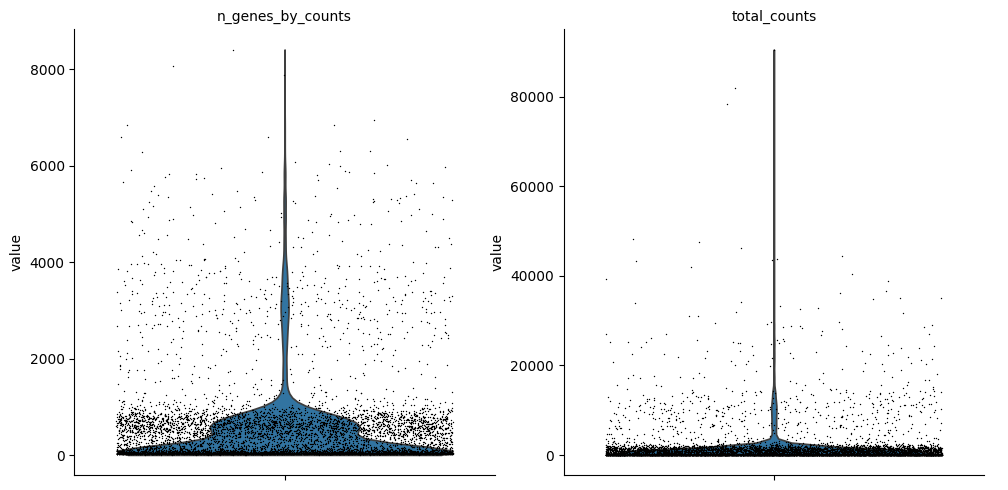

In [ ]:
# Plot the result
sc.pl.violin(
    adata, ['n_genes_by_counts', 'total_counts'],
    jitter=0.4, multi_panel=True
)

In [ ]:
# Warning! Very harsh thresholds to keep comp. time small
sc.pp.filter_cells(adata, min_genes=1000)
sc.pp.filter_genes(adata, min_cells=100)
adata

filtered out 7263 cells that have less than 1000 genes expressed
filtered out 29726 genes that are detected in less than 100 cells


AnnData object with n_obs × n_vars = 737 × 6875
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells'

In [ ]:
mask = adata.var_names.str.startswith('MT-')
print(f"Mito genes: {adata.var_names[mask].tolist()}")

adata.var['mt'] = mask

Mito genes: ['MT-ND1', 'MT-ND2', 'MT-CO1', 'MT-CO2', 'MT-ATP8', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4', 'MT-ND5', 'MT-ND6', 'MT-CYB']


In [ ]:
# Calculate common QC metrics (see docs for details)
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

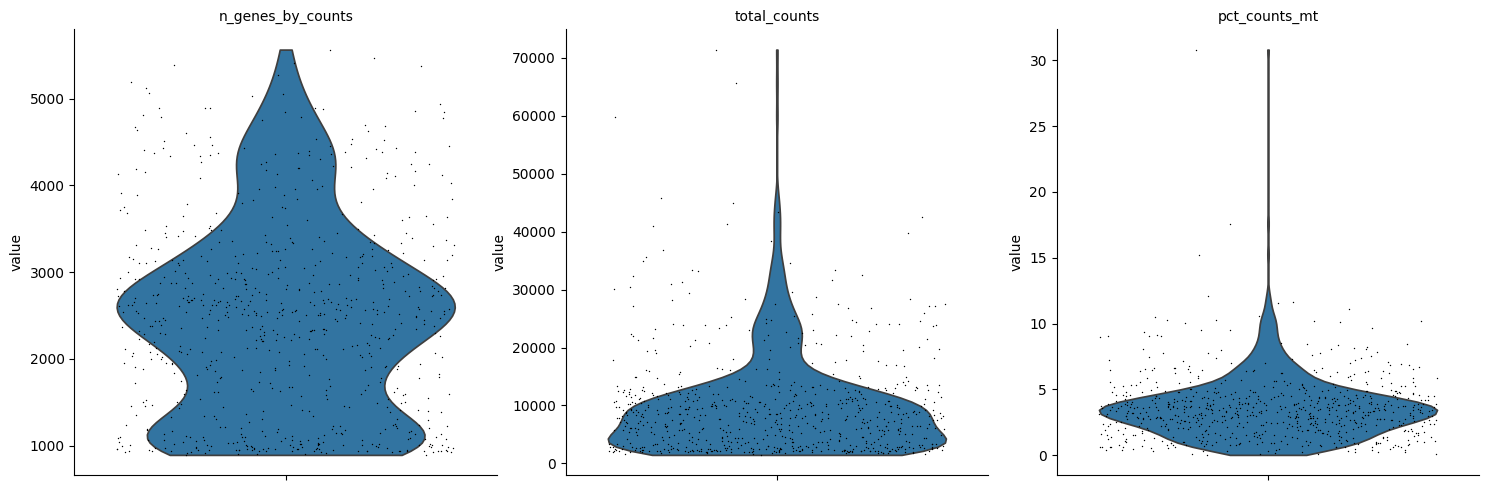

In [ ]:
# Plot the result
sc.pl.violin(
    adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
    jitter=0.4, multi_panel=True
)

In [ ]:
# Apply filters
adata = adata[adata.obs.n_genes_by_counts < 5_000, :]
adata = adata[adata.obs.total_counts < 25_000, :]
adata = adata[adata.obs.pct_counts_mt < 15, :]
adata

View of AnnData object with n_obs × n_vars = 691 × 6875
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt'

In [ ]:
# Normalize the data to CPM & take the log
sc.pp.normalize_total(adata, target_sum=1e6) # sum(cell counts) = 1e6
sc.pp.log1p(adata)

normalizing counts per cell
    finished (0:00:00)


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [ ]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=7, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


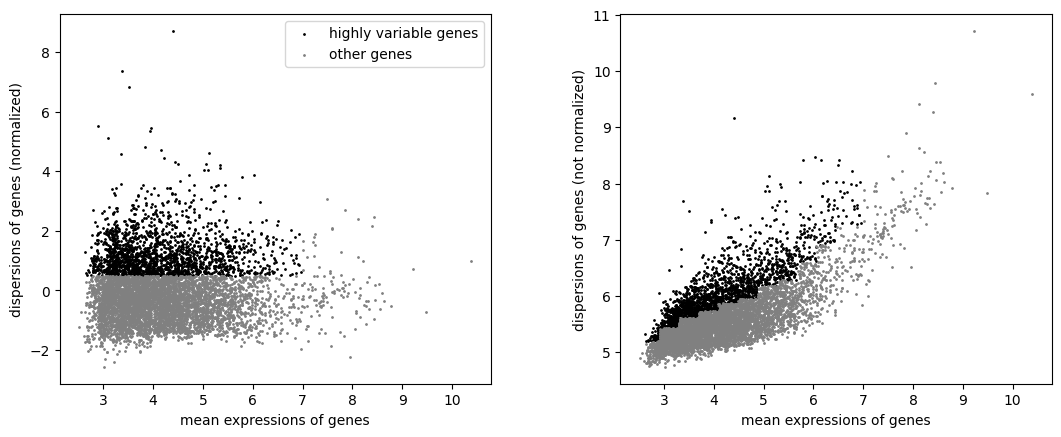

In [ ]:
sc.pl.highly_variable_genes(adata)

In [ ]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 691 × 1822
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg'

In [ ]:
sc.pp.regress_out(adata, ['total_counts', 'pct_counts_mt'])

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_simple.py:672: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:05)


In [ ]:
sc.pp.scale(adata, max_value=10) # clip values > 10

##### **Step 4. Calculate PCA, UMAP, t-SNE**

In [ ]:
adata # n_obs × n_vars = 691 × 1822

AnnData object with n_obs × n_vars = 691 × 1822
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg'

In [ ]:
import numpy as np
# Subsample to speed up the analysis
ind = np.random.choice(np.arange(len(adata.X)), 6_90, replace=False)

X = adata.X[ind].copy()
print(f"Cells vs Genes: {X.shape}")

Cells vs Genes: (690, 1822)


In [ ]:
from sklearn.manifold import Isomap, MDS, TSNE, SpectralEmbedding, LocallyLinearEmbedding
from sklearn.decomposition import PCA

# Set of models to work with
embeddings = {
    "Isomap embedding": Isomap(n_components=2),
    "MDS embedding": MDS(n_components=2, n_init=1, max_iter=100),
    "t-SNE embedding": TSNE(n_components=2, init='pca', learning_rate='auto', random_state=42),
    "Spectral embedding": SpectralEmbedding(n_components=2, random_state=32),
    "LLE embedding": LocallyLinearEmbedding(n_components=2, method="modified"),
    "PCA": PCA(n_components=2)
}

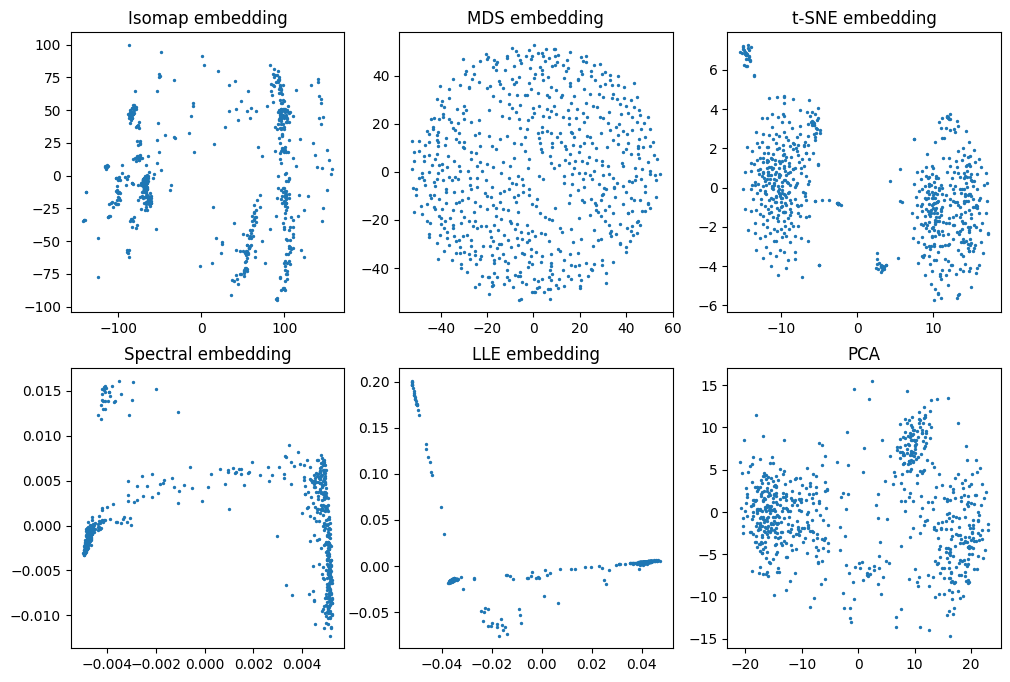

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes = axes.ravel()

assert len(axes) == len(embeddings)

for ax, (name, model) in zip(axes, embeddings.items()):
  ax.set_title(name)
  transformed = model.fit_transform(X)
  ax.scatter(transformed[:, 0], transformed[:, 1], s=2)

> In my humble opinion, **Isomap embedding** is the best, because I can observe many clusters.

computing PCA
    with n_comps=50
    finished (0:00:00)


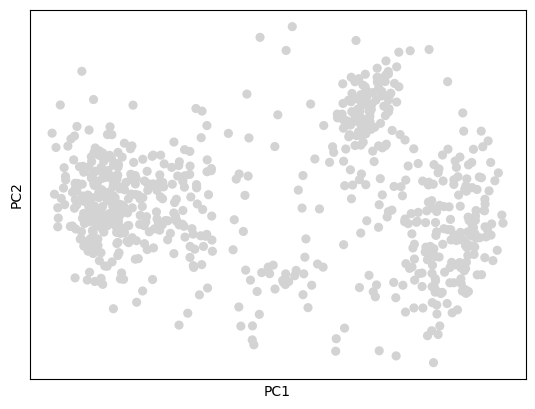

In [ ]:
sc.tl.pca(adata)
sc.pl.pca(adata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:33)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:05)


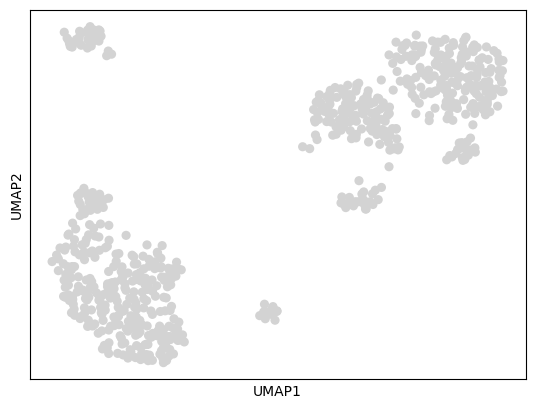

In [ ]:
# рассчитывает расстояние между ближайшими соседями
sc.pp.neighbors(adata) # doesn't work without this line
sc.tl.umap(adata)
sc.pl.umap(adata)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:08)


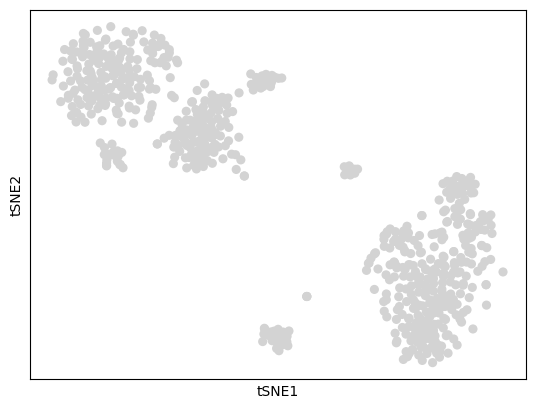

In [ ]:
# рассчитывает расстояние между всеми парами точек
sc.tl.tsne(adata) # tl - tools (algorithms)
sc.pl.tsne(adata) # pl - plotting

##### **Step 5. Run Clustering (K-means / Agg. Clustering / Leiden algorithms)**

In [ ]:
adata

AnnData object with n_obs × n_vars = 691 × 1822
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
sample = adata # я не беру подвыборку, так у меня и так мало наблюдений
sample # да, просто записала те же данные в другую переменную
# без осуждений, пожалуйста!!!

AnnData object with n_obs × n_vars = 691 × 1822
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'total_counts_mt', 'pct_counts_mt'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'tsne'
    obsm: 'X_pca', 'X_umap', 'X_tsne'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift

# Cluster elements
algorithms = [
    ("K-means", KMeans(n_clusters=10, random_state=12)),
    ("Agglomerative Clustering", AgglomerativeClustering(n_clusters=10)),
    # ("Mean Shift", MeanShift()) # Too long
]

# Run K-means and Agglomerative Clusterings
for name, algo in algorithms:
  print(name)
  clustering = algo.fit(sample.X)
  sample.obs[name] = clustering.labels_
  # -> category dtype
  sample.obs[name] = sample.obs[name].astype('category')

K-means
Agglomerative Clustering


In [ ]:
!python3 -m pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 55.8 MB/s eta 0:00:00


In [ ]:
# Run the Leiden clustering
sc.tl.leiden(sample, resolution=0.5)

running Leiden clustering
    finished: found 8 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


<ipython-input-67-418423a48df3>:2: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(sample, resolution=0.5)


##### **Step 6. Plotting the Results (Сolor cells using K-means / Agg. Clustering / Leiden algorithms)**

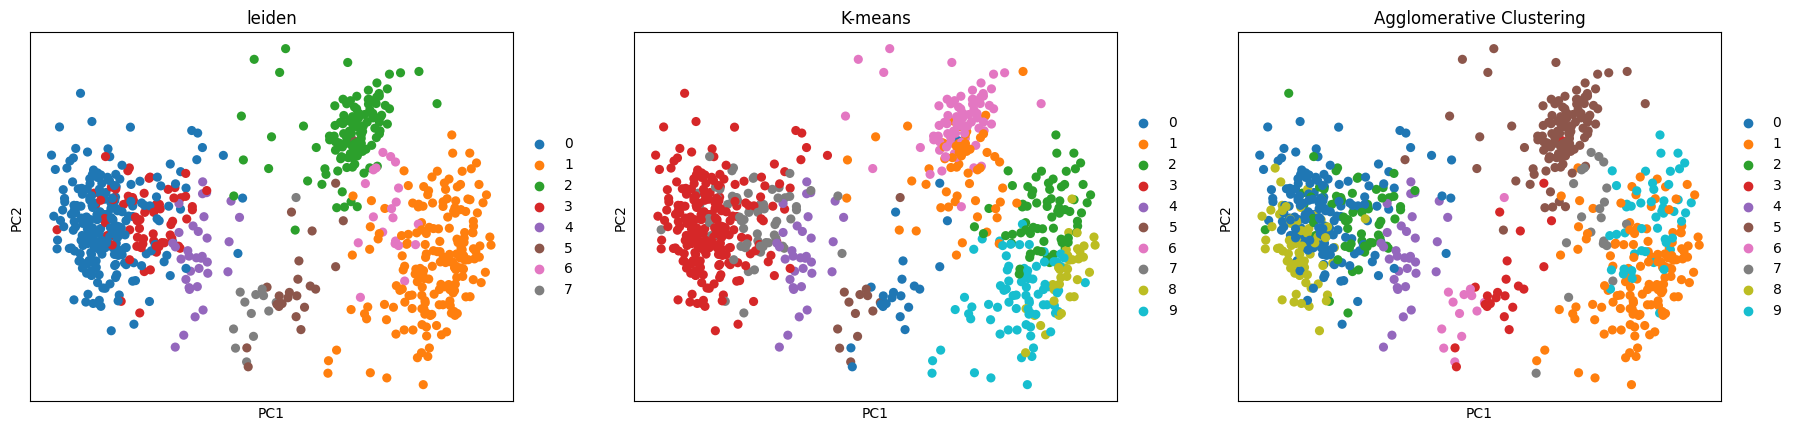

In [ ]:
sc.pl.pca(
    sample,
    color=['leiden', 'K-means', 'Agglomerative Clustering']
)

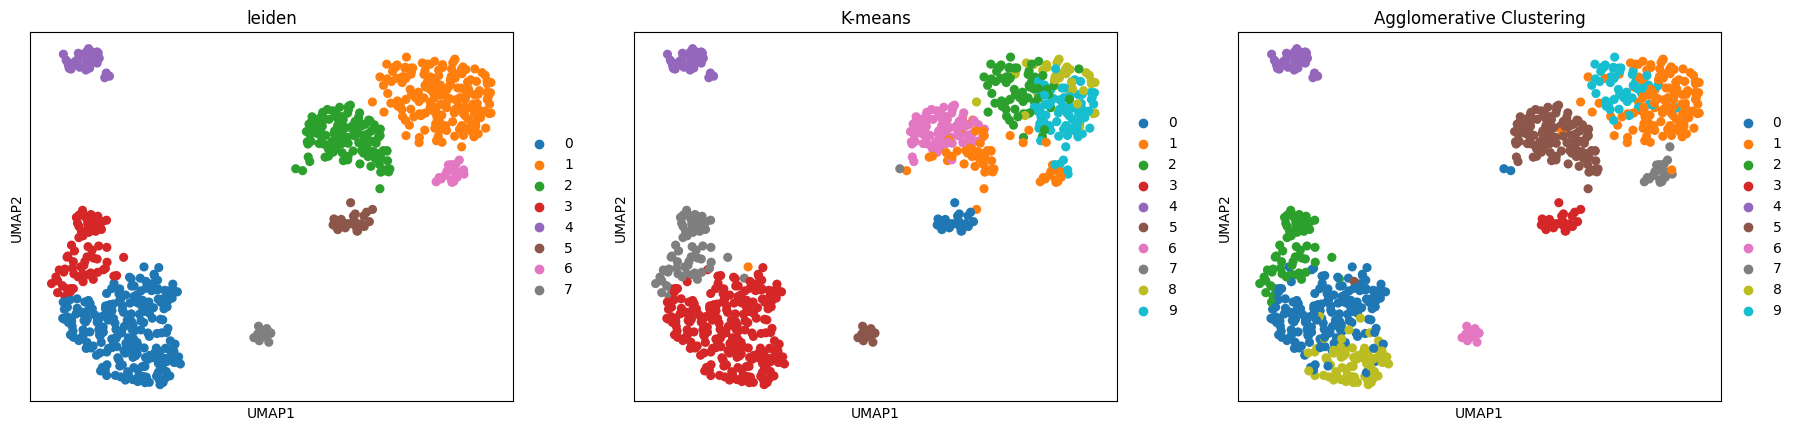

In [ ]:
sc.pl.umap(
    sample,
    color=['leiden', 'K-means', 'Agglomerative Clustering']
)

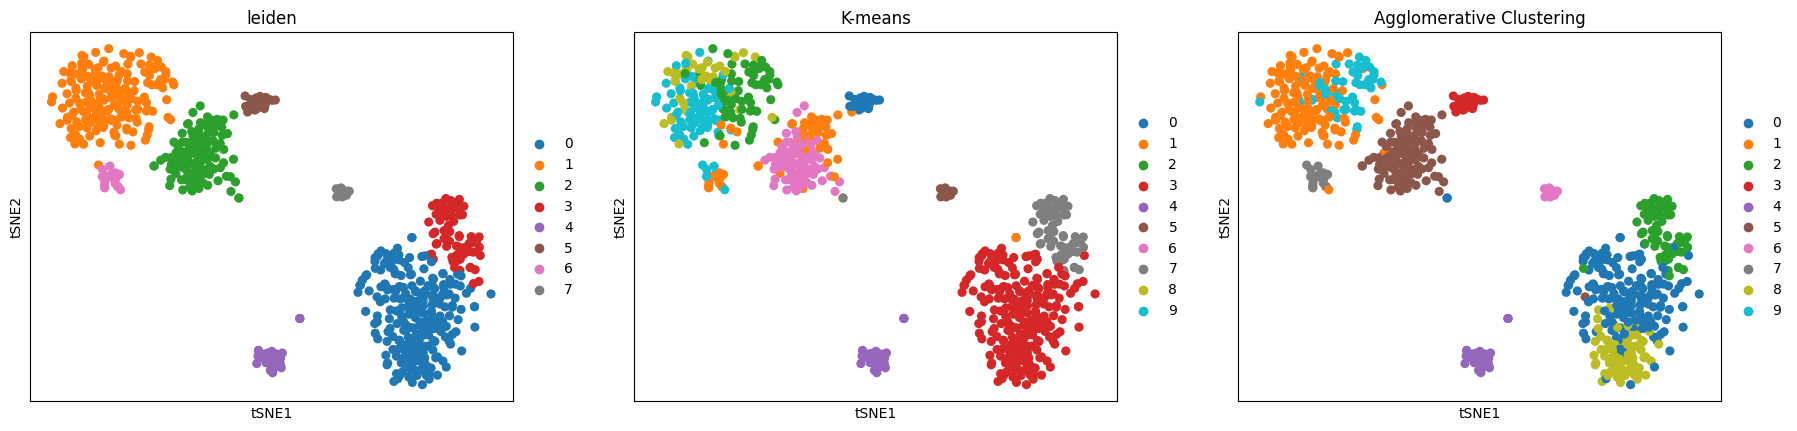

In [ ]:
sc.pl.tsne(
    sample,
    color=['leiden', 'K-means', 'Agglomerative Clustering']
)

#### [1.5] Make several plots showing how the representation of data is changing for UMAP & t-SNE by tweaking parameters of those algorithms. For the representation of your choice, find optimal number of clusters by tweaking `n_clusters` in K-means and `resolution` in Leiden algorithm. What was the optimal number of clusters for your dataset? Justify your choice.

##### **Step 1. Make several plots showing how the representation of data is changing for UMAP & t-SNE by tweaking parameters of those algorithms**

Representation of my choise:

> sc.tl.tsne(adata, perplexity = 50, metric = 'euclidean', learning_rate = 1000)

In [ ]:
sc.tl.tsne(adata, perplexity = 50, metric = 'euclidean', learning_rate = 1000)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:13)


> UMAP

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


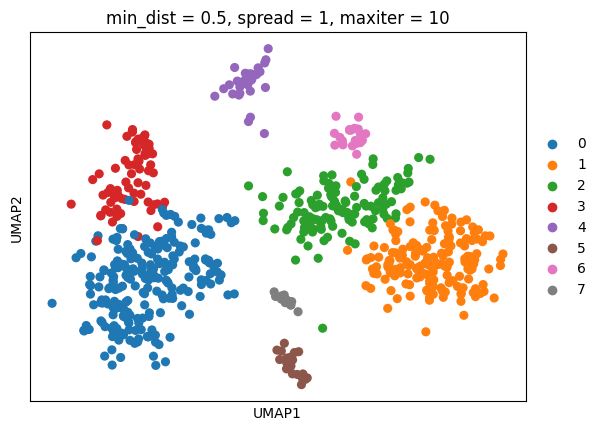

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


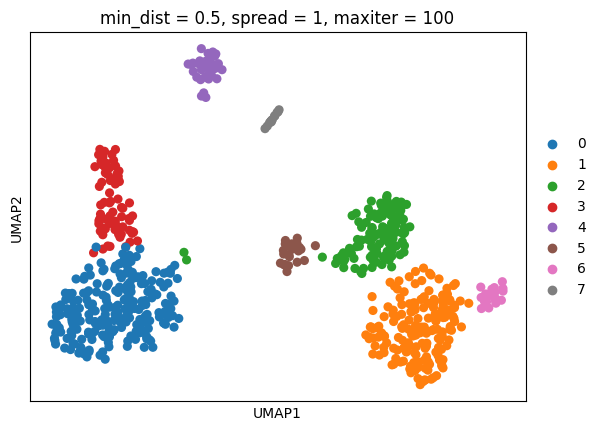

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


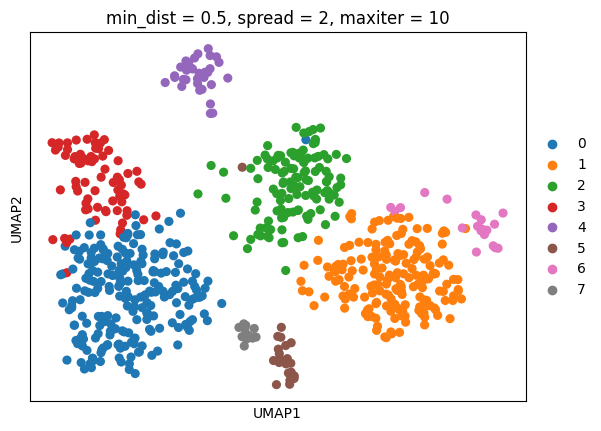

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


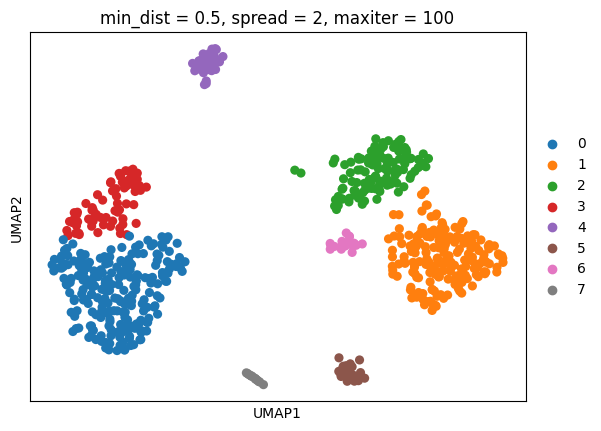

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


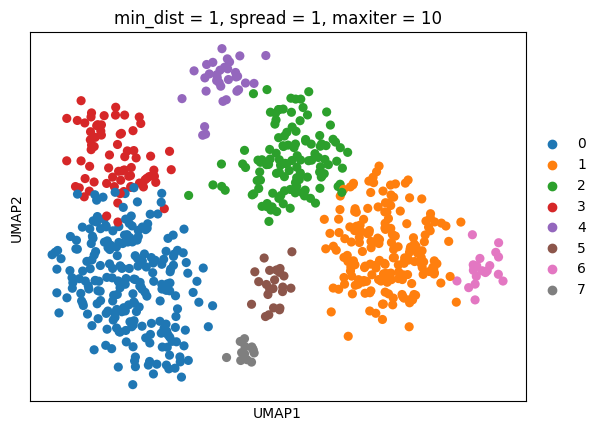

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


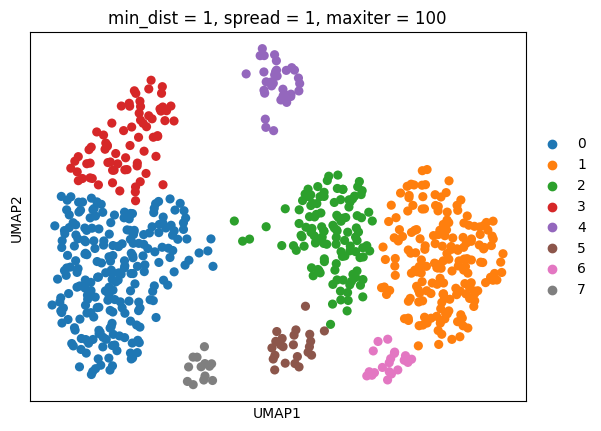

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


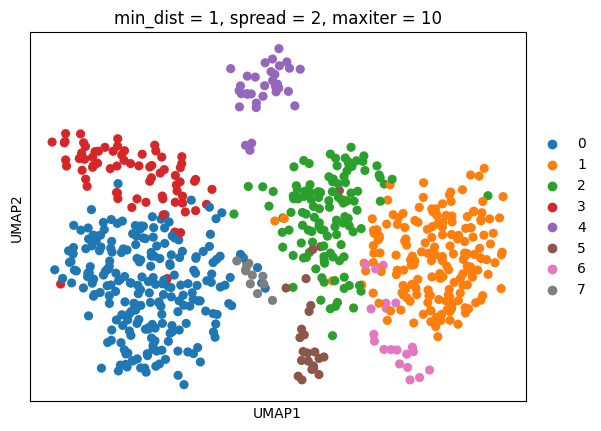

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:00)


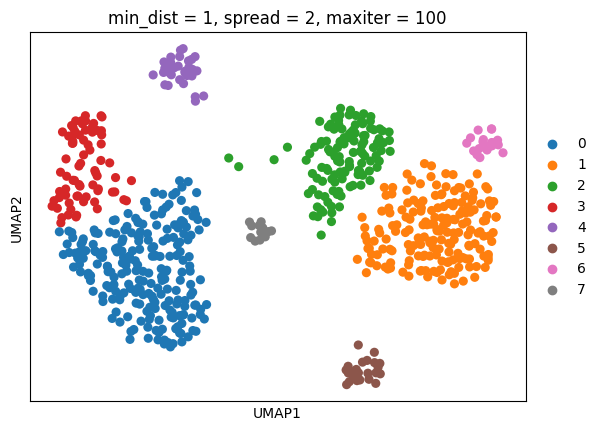

In [ ]:
# https://scanpy.readthedocs.io/en/stable/generated/scanpy.tl.umap.html#scanpy.tl.umap

mindist = [0.5, 1]
spread = [1, 2]
maxiter = [10, 100]

for i in mindist:
  for j in spread:
    for m in maxiter:
      sc.tl.umap(adata, min_dist = i, spread = j, maxiter = m)
      sc.pl.umap(adata,
                 color=['leiden'],
                 title = f'min_dist = {i}, spread = {j}, maxiter = {m}')

# Можно еще много параметров менять, конечно!!! Но остановимся тут.

> t-SNE

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:10)


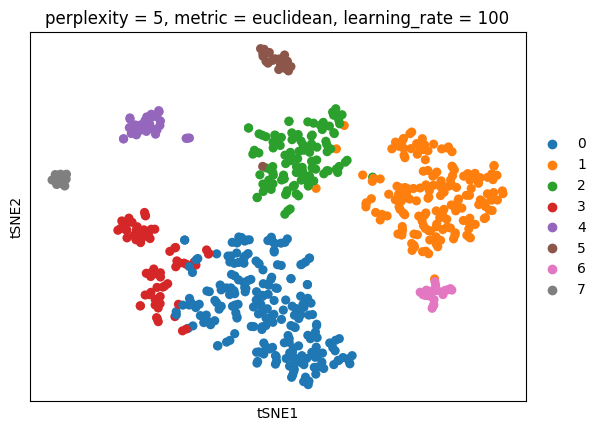

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:03)


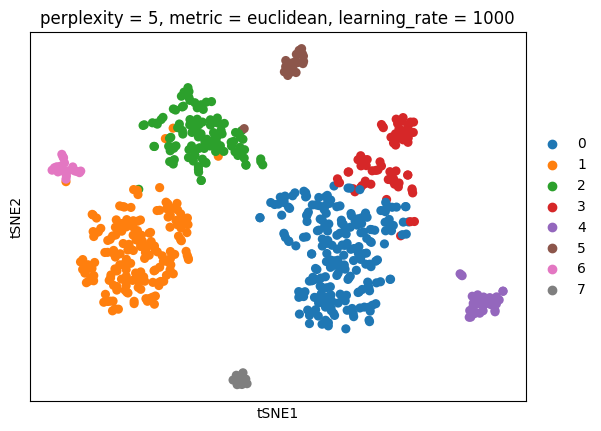

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:03)


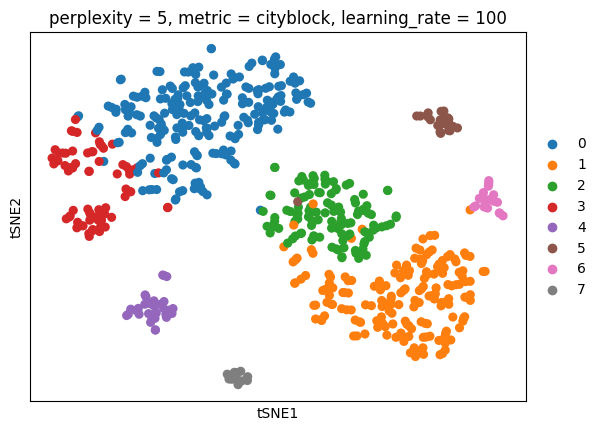

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:05)


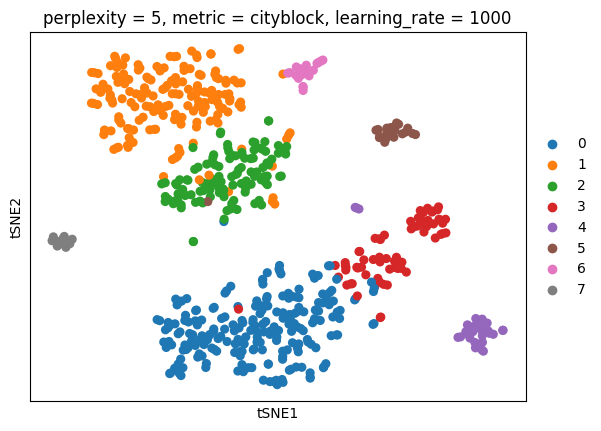

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:06)


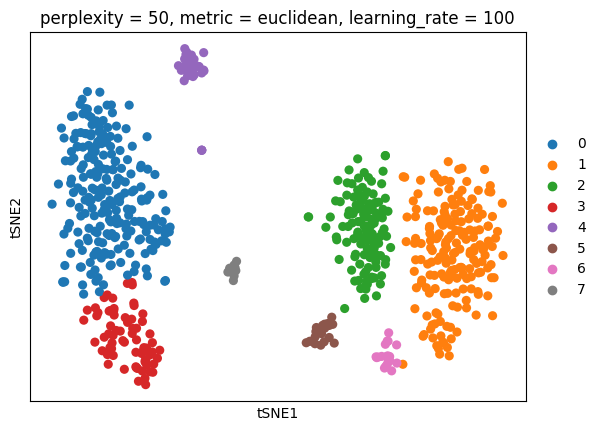

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:07)


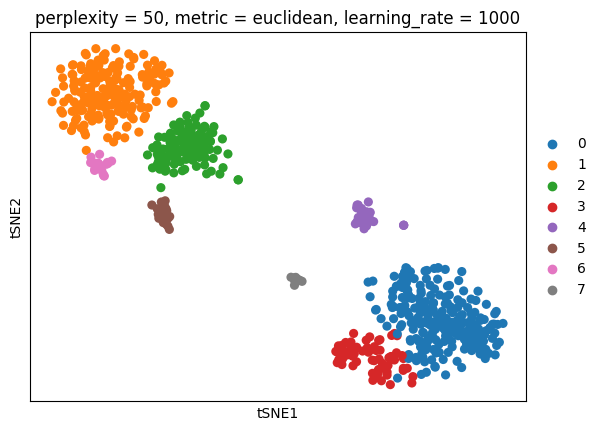

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:06)


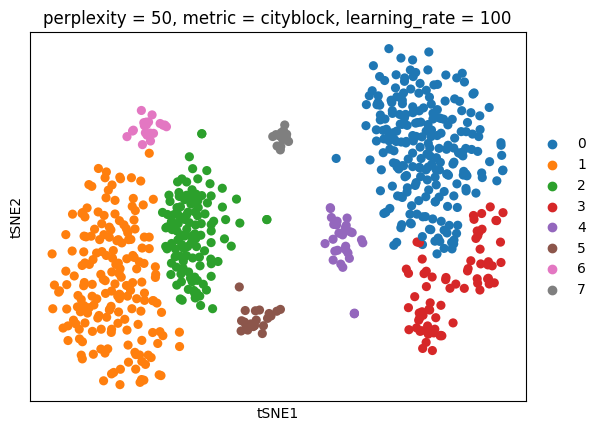

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:07)


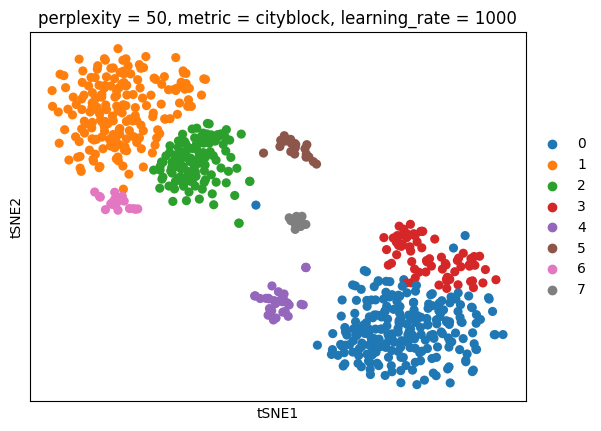

In [ ]:
perplexity = [5, 50]
metric = ['euclidean', 'cityblock']
learning_rate = [100, 1000]

for i in perplexity:
  for j in metric:
    for m in learning_rate:
      sc.tl.tsne(adata, perplexity = i, metric = j, learning_rate = m)
      sc.pl.tsne(adata,
                 color=['leiden'],
                 title = f'perplexity = {i}, metric = {j}, learning_rate = {m}')

##### **Step 2. For the representation of your choice, find optimal number of clusters by tweaking n_clusters in K-means and resolution in Leiden algorithm**

Representation of my choise:

> sc.tl.tsne(adata, perplexity = 50, metric = 'euclidean', learning_rate = 1000)

In [ ]:
sc.tl.tsne(adata, perplexity = 50, metric = 'euclidean', learning_rate = 1000)

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:05)


In [ ]:
from sklearn.cluster import KMeans

# Cluster elements
algorithms = [
    ("K-means (5)", KMeans(n_clusters=5, random_state=12)),
    ("K-means (10)", KMeans(n_clusters=10, random_state=12)),
    ("K-means (15)", KMeans(n_clusters=15, random_state=12)),
    ("K-means (20)", KMeans(n_clusters=20, random_state=12)),
    ("K-means (25)", KMeans(n_clusters=25, random_state=12))
]

# Run K-means
for name, algo in algorithms:
  print(name)
  clustering = algo.fit(sample.X)
  sample.obs[name] = clustering.labels_
  # -> category dtype
  sample.obs[name] = sample.obs[name].astype('category')

K-means (5)
K-means (10)
K-means (15)
K-means (20)
K-means (25)


computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:07)
perplexity = 50, metric = euclidean, learning_rate = 1000


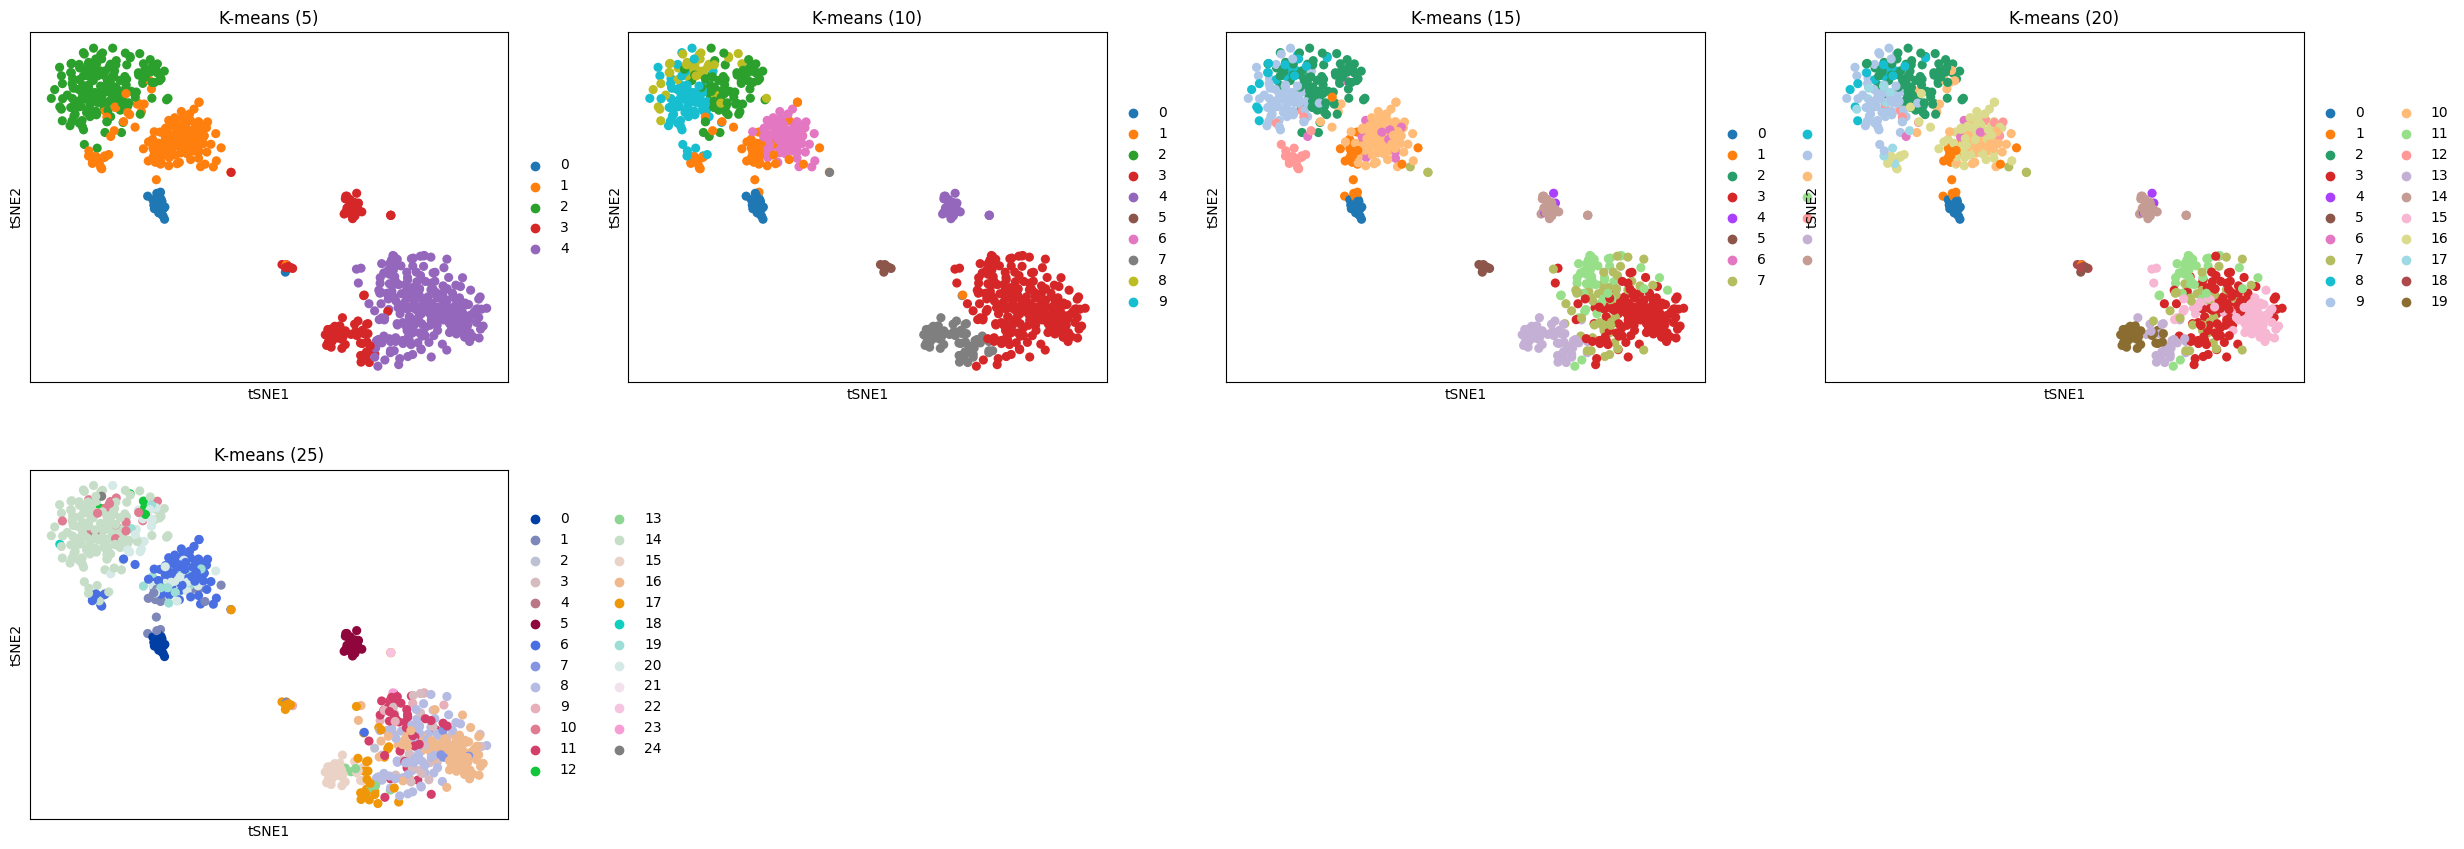

In [ ]:
sc.tl.tsne(adata, perplexity = 50, metric = 'euclidean', learning_rate = 1000)
print('perplexity = 50, metric = euclidean, learning_rate = 1000')
sc.pl.tsne(adata,
           color=['K-means (5)', 'K-means (10)', 'K-means (15)', 'K-means (20)', 'K-means (25)'])

> The sufficient number of clusters is definately under 10. Let's recount K-means.



In [ ]:
from sklearn.cluster import KMeans

# Cluster elements
algorithms = [
    ("K-means (2)", KMeans(n_clusters=2, random_state=12)),
    ("K-means (3)", KMeans(n_clusters=3, random_state=12)),
    ("K-means (4)", KMeans(n_clusters=4, random_state=12)),
    ("K-means (5)", KMeans(n_clusters=5, random_state=12)),
    ("K-means (6)", KMeans(n_clusters=6, random_state=12)),
    ("K-means (7)", KMeans(n_clusters=7, random_state=12)),
    ("K-means (8)", KMeans(n_clusters=8, random_state=12)),
    ("K-means (9)", KMeans(n_clusters=9, random_state=12)),
    ("K-means (10)", KMeans(n_clusters=10, random_state=12))
]

# Run K-means
for name, algo in algorithms:
  print(name)
  clustering = algo.fit(sample.X)
  sample.obs[name] = clustering.labels_
  # -> category dtype
  sample.obs[name] = sample.obs[name].astype('category')

K-means (2)
K-means (3)
K-means (4)
K-means (5)
K-means (6)
K-means (7)
K-means (8)
K-means (9)
K-means (10)


computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:09)
perplexity = 50, metric = euclidean, learning_rate = 1000


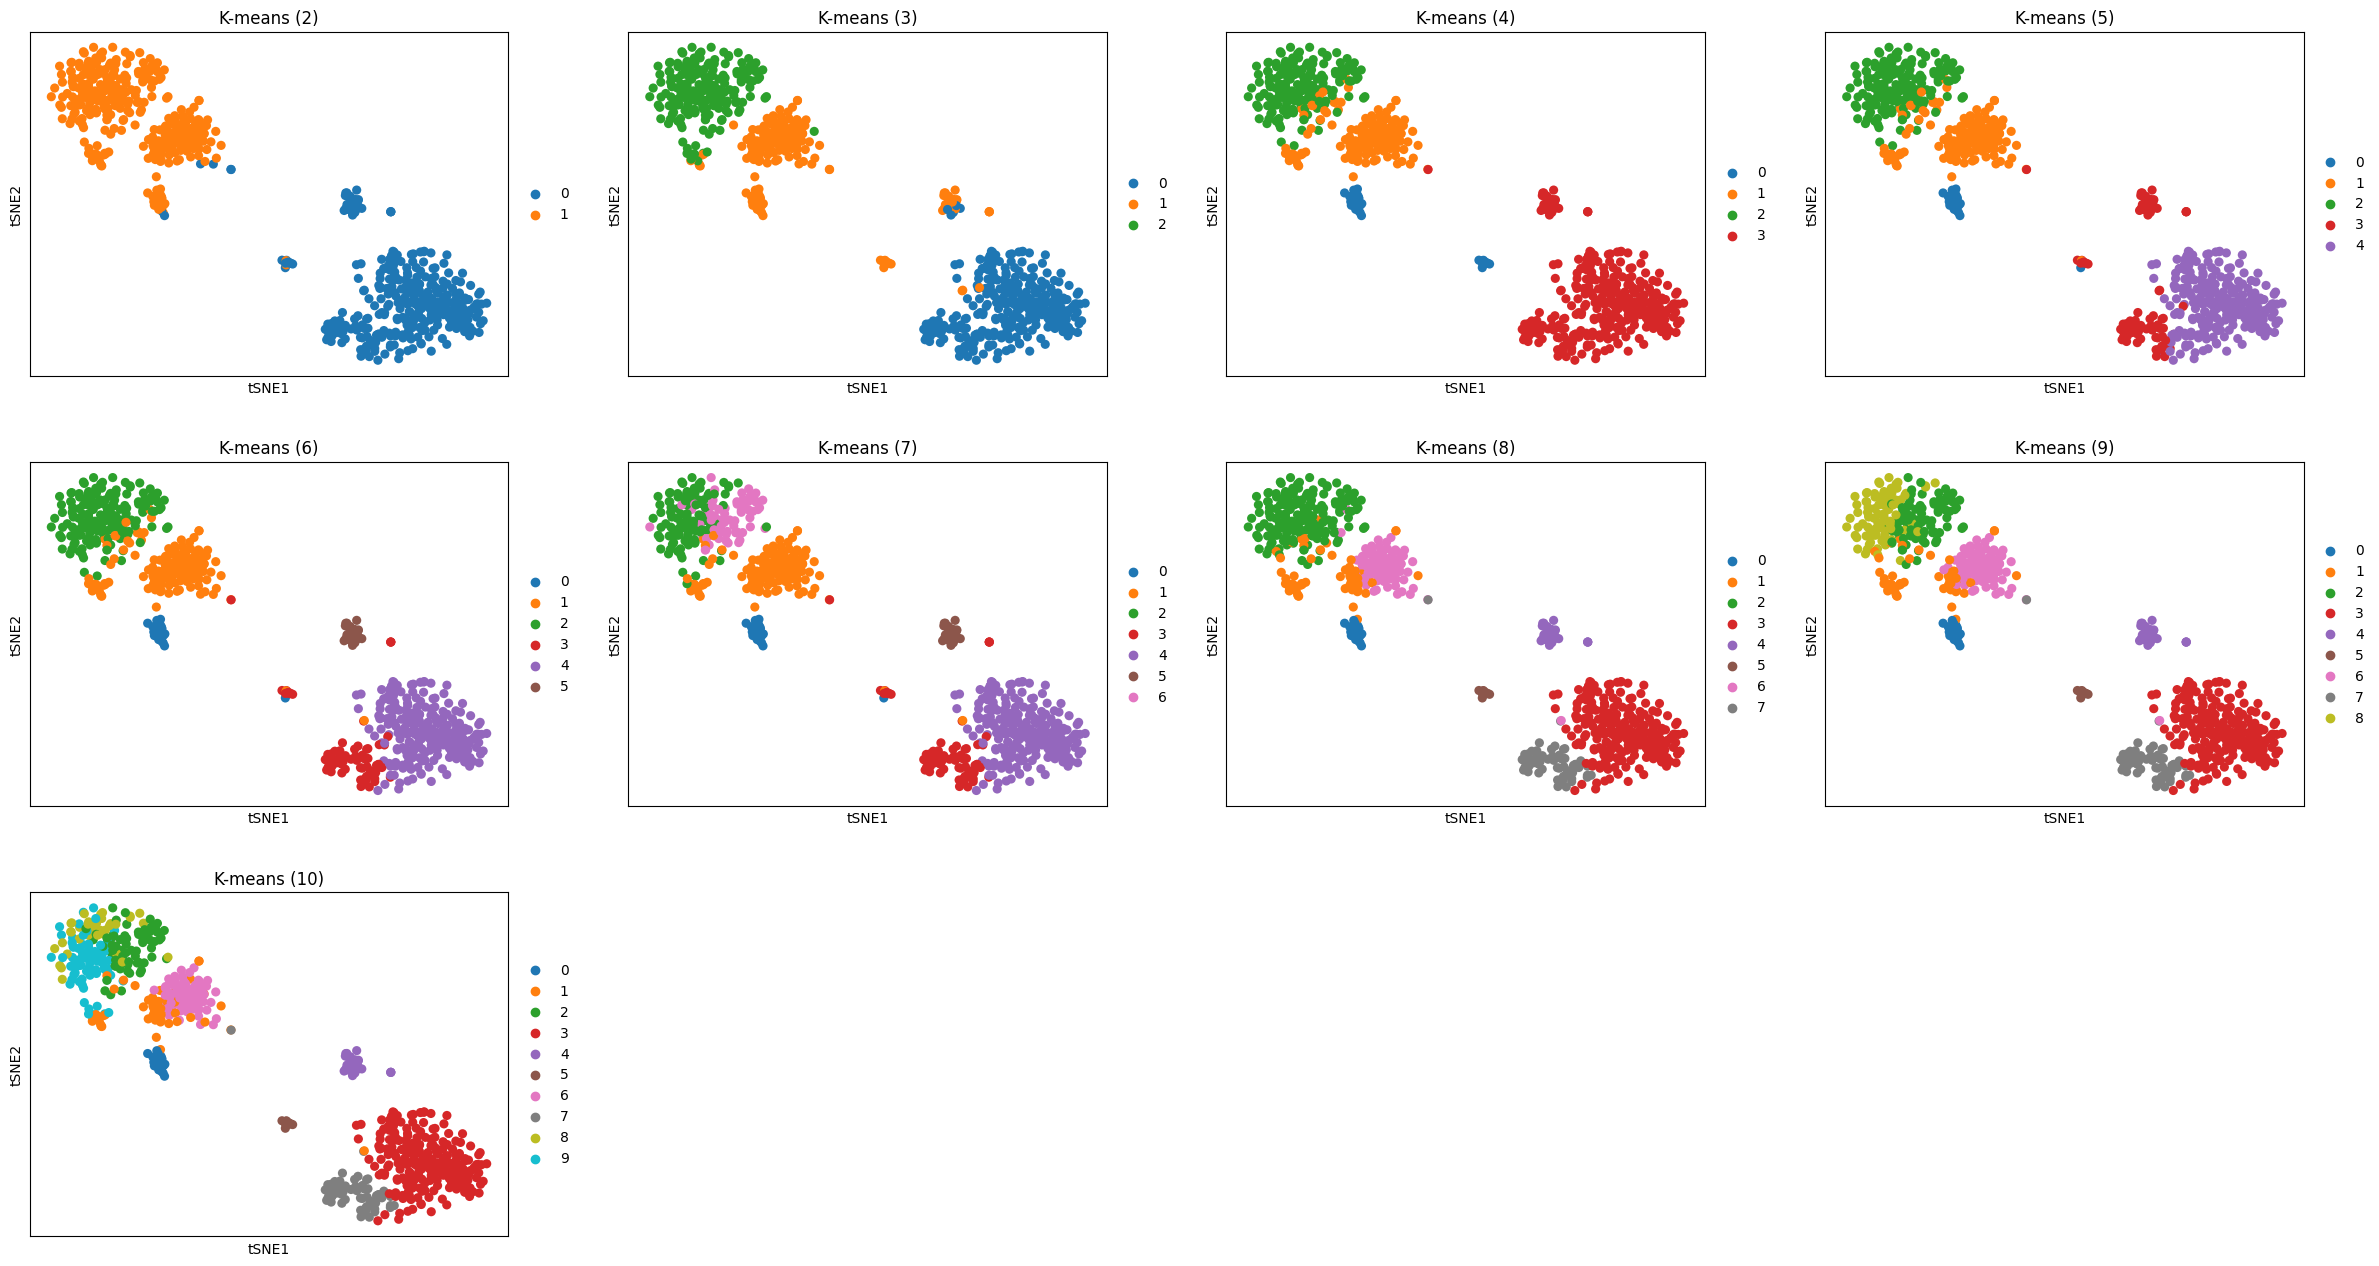

In [ ]:
sc.tl.tsne(adata, perplexity = 50, metric = 'euclidean', learning_rate = 1000)
print('perplexity = 50, metric = euclidean, learning_rate = 1000')
sc.pl.tsne(adata,
           color=['K-means (2)', 'K-means (3)', 'K-means (4)', 'K-means (5)',
                  'K-means (6)', 'K-means (7)', 'K-means (8)', 'K-means (9)', 'K-means (10)'])

In [ ]:
# Run the Leiden clustering
sc.tl.leiden(sample, resolution=0.3, key_added='leiden (0.1)')
sc.tl.leiden(sample, resolution=0.3, key_added='leiden (0.3)')
sc.tl.leiden(sample, resolution=0.5, key_added='leiden (0.5)')
sc.tl.leiden(sample, resolution=0.7, key_added='leiden (0.7)')
sc.tl.leiden(sample, resolution=0.9, key_added='leiden (0.9)')
sc.tl.leiden(sample, resolution=1.1, key_added='leiden (1.1)')
sc.tl.leiden(sample, resolution=1.3, key_added='leiden (1.3)')
sc.tl.leiden(sample, resolution=1.5, key_added='leiden (1.5)')
sc.tl.leiden(sample, resolution=1.7, key_added='leiden (1.7)')
sc.tl.leiden(sample, resolution=1.9, key_added='leiden (1.9)')

running Leiden clustering
    finished: found 8 clusters and added
    'leiden (0.1)', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden (0.3)', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden (0.5)', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'leiden (0.7)', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden (0.9)', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 10 clusters and added
    'leiden (1.1)', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 11 clusters and added
    'leiden (1.3)', the cluster labels (adata.obs, categorical) (0:00:00)
running Le

computing tSNE
    using 'X_pca' with n_pcs = 50
    using sklearn.manifold.TSNE
    finished: added
    'X_tsne', tSNE coordinates (adata.obsm)
    'tsne', tSNE parameters (adata.uns) (0:00:06)
perplexity = 50, metric = euclidean, learning_rate = 1000


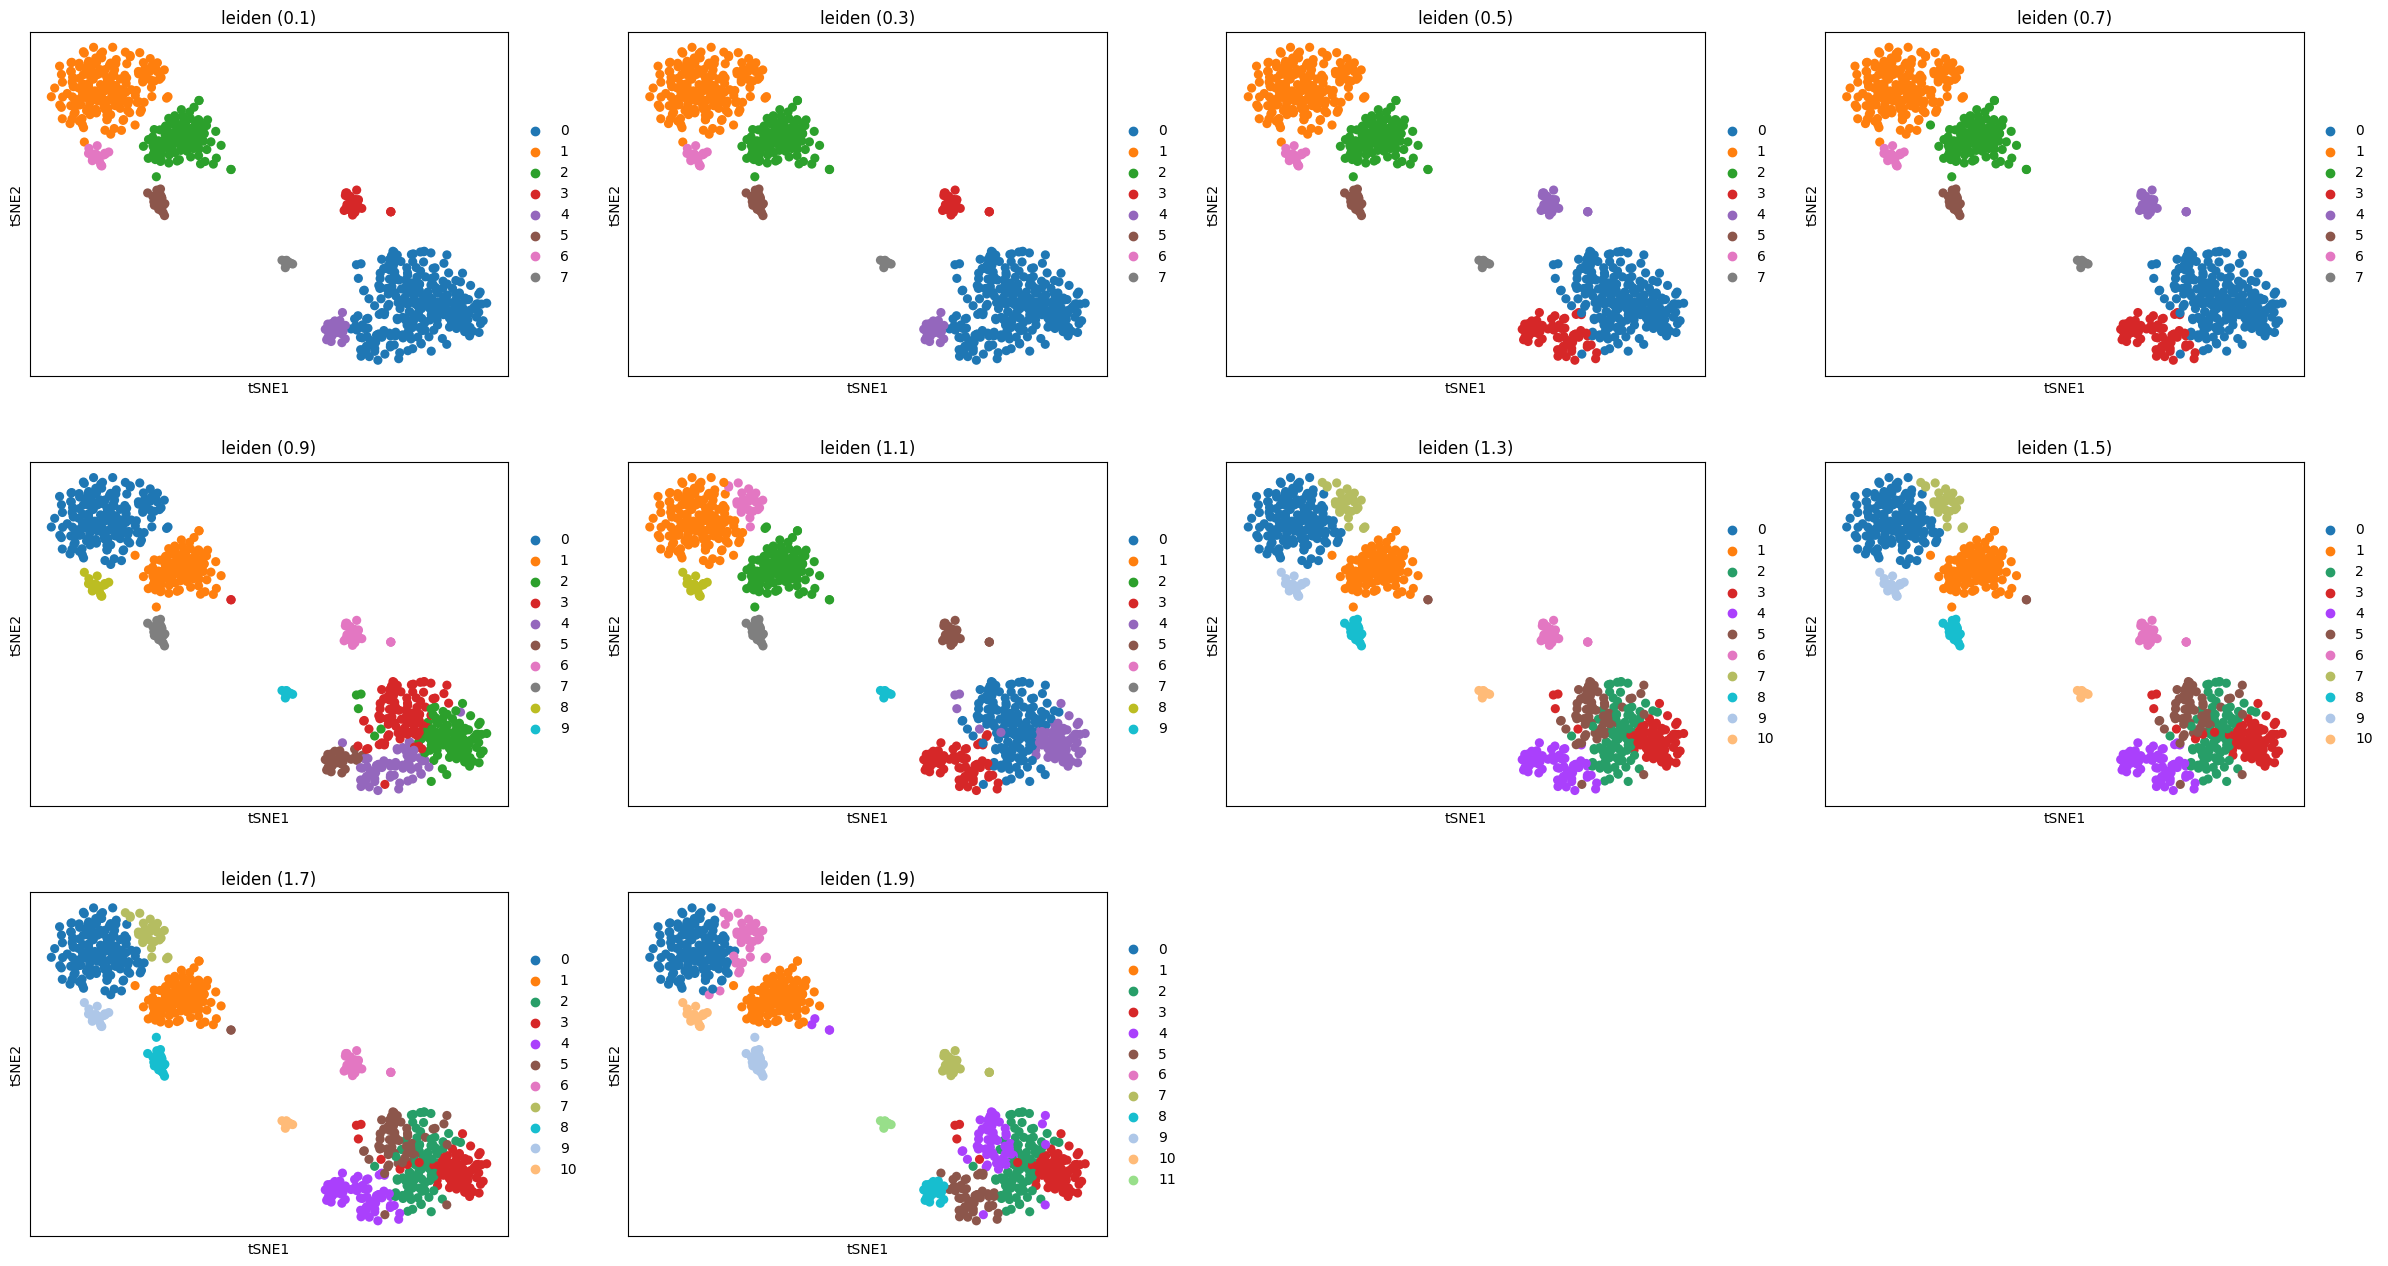

In [ ]:
sc.tl.tsne(adata, perplexity = 50, metric = 'euclidean', learning_rate = 1000)
print('perplexity = 50, metric = euclidean, learning_rate = 1000')
sc.pl.tsne(adata,
           color=['leiden (0.1)', 'leiden (0.3)', 'leiden (0.5)', 'leiden (0.7)', 'leiden (0.9)', 'leiden (1.1)',
                  'leiden (1.3)', 'leiden (1.5)', 'leiden (1.7)', 'leiden (1.9)'])

##### **Step 3. Elbow Curve with Silhoette Coefficients**

Пользовалась этим:

> https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

> https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

> https://stats.stackexchange.com/questions/576902/silhouette-score-vs-distortion-score

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import anndata

X_df = adata.to_df()
X_df.head()

SKI    CEP104     VAMP3      H6PD  SLC25A33  \
AAAGGATCAGGAATAT-1 -0.334564 -0.181138  2.592294 -0.267782  0.018887   
AAAGGATTCGCAGATT-1 -0.378200 -0.396284  1.716311 -0.333476 -0.513245   
AAAGGTATCCAAGCAT-1 -0.355919 -0.329309 -0.478003 -0.306966 -0.356239   
AAAGTCCTCTGAGAAA-1 -0.364192 -0.180510 -0.392400 -0.288322  0.050026   
AACAAAGAGAACAAGG-1 -0.506908 -0.501280 -0.757540 -0.440374 -0.666140   

                        RBP7     UBE4B     KIF1B       PGD   EXOSC10  ...  \
AAAGGATCAGGAATAT-1 -0.118397 -0.528586  1.491238 -0.587312 -0.084746  ...   
AAAGGATTCGCAGATT-1 -0.460228 -0.818973 -0.817190 -0.778100 -0.410217  ...   
AAAGGTATCCAAGCAT-1 -0.359784 -0.721400 -0.865308 -0.713734 -0.305696  ...   
AAAGTCCTCTGAGAAA-1 -0.096978  1.911206 -1.062564 -0.603770 -0.094750  ...   
AACAAAGAGAACAAGG-1 -0.553332  0.714950  1.228266 -0.932634 -0.608598  ...   

                    RAP2C-AS1     MBNL3   FAM122C    ATP11C     MTMR1  \
AAAGGATCAGGAATAT-1  -0.156134 -0.068025 -0.242593 -0.302483 -0.349463   
AAAGGATTCGCAGATT-1  -0.457159 -0.498928 -0.377913 -0.591667  2.213751   
AAAGGTATCCAAGCAT-1   2.487168 -0.371169 -0.329182  1.835973 -0.490516   
AAAGTCCTCTGAGAAA-1  -0.129000 -0.044935  3.463456 -0.302787 -0.354729   
AACAAAGAGAACAAGG-1   1.982070  1.971806  2.144489 -0.736942  1.400682   

                       IRAK1      GAB3     BRCC3     TMLHE     VAMP7  
AAAGGATCAGGAATAT-1 -0.020920 -0.295939 -0.142919 -0.311304 -0.131427  
AAAGGATTCGCAGATT-1  3.017325  2.206154 -0.479932 -0.497133  2.457553  
AAAGGTATCCAAGCAT-1 -0.266607 -0.487814 -0.377325 -0.434303 -0.351725  
AAAGTCCTCTGAGAAA-1 -0.033663 -0.298120 -0.134048  2.792454 -0.127121  
AACAAAGAGAACAAGG-1 -0.610296 -0.723226  1.944644 -0.649340 -0.593090  

[5 rows x 1822 columns]

In [ ]:
type(X_df)

pandas.core.frame.DataFrame

In [ ]:
# Convert the DataFrame to a NumPy array
X = X_df.values

In [ ]:
type(X)

numpy.ndarray

In [ ]:
silhouette_coeffs = []

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

for k in range(2, 16):
    # initialise kmeans
    model = KMeans(n_clusters=k, random_state=12)
    model.fit(X)
    labels = model.predict(X)  # Use predict to get cluster labels
    # silhouette score
    silhouette_avg = silhouette_score(X, labels)
    silhouette_coeffs.append(silhouette_avg)
   # print(f"For k = {k}, the silhouette score is {silhouette_avg}")

In [ ]:
counter = 1

print('Silhouette Сoefficients:', end = '\n\n')

for i in silhouette_coeffs:
  counter += 1
  print(f'k = {counter}:  {i}')

Silhouette Сoefficients:

k = 2:  0.09137820800841936
k = 3:  0.046852705790243705
k = 4:  0.04740552185564169
k = 5:  0.033992910211486684
k = 6:  0.03379031193303459
k = 7:  0.029752288197343053
k = 8:  0.02280630725191196
k = 9:  0.023280286981776144
k = 10:  0.02135479356453392
k = 11:  0.019203207244262097
k = 12:  0.016541435246977522
k = 13:  0.016516689420888728
k = 14:  0.011896263509699778
k = 15:  0.01001563854657581


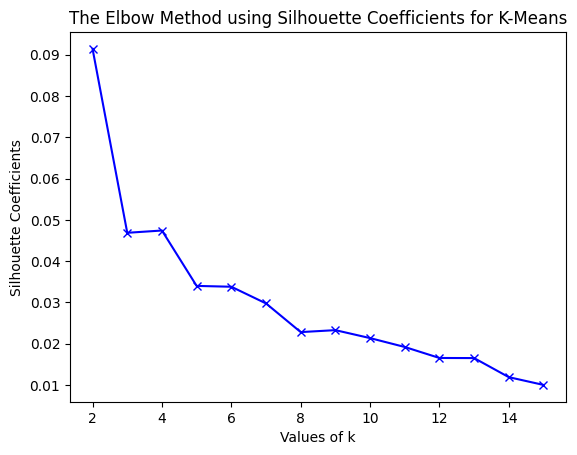

In [ ]:
import matplotlib.pyplot as plt
k = list(range(2, 16))
plt.plot(k, silhouette_coeffs, 'bx-')
plt.xlabel('Values of k')
plt.ylabel('Silhouette Coefficients')
plt.title('The Elbow Method using Silhouette Coefficients for K-Means')
plt.show()

##### **Step 4. What was the optimal number of clusters for your dataset? Justify your choice.**

K-means

> Мне кажется, что оптимальное число кластеров здесь = 4-5 (если судить по графикам кластеров). Видно, что кластеры практически не смешиваются, то есть четко различимы. Однако если посмотреть на Elbow Curve, то можно заметить, что сгиб локтя находится там, где число кластеров = 6.

Leiden

> Этот алгоритм отработал гораздо лучше K-means (сужу визуально по разбиеню на кластеры). Здесь клетки хорошо делятся на 7, 8, 9 и 10 кластеров (судя по графикам кластеров). Кластеры красивые, четко различимые друг от друга.


#### [1] Analyze your clusters and identify if any of them is an outlier in terms of technical scRNA characteristics, such as: number of genes per cell, percentage of mitochondrial expression. Make relevant visualizations.

Я возьму:

> sc.tl.tsne(adata, perplexity = 50, metric = 'euclidean', learning_rate = 1000)

> K-Means, k = 6

> посмотреть на среднне значение каунтов в каждом кластере, построить гистограмму. Если нет выделяющихся кластеров, то все нормально.

> https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.bar.html#matplotlib.axes.Axes.bar

##### **Step 1. Получить разделение на кластеры (лейблы), посчитать средние, построить графики**

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=6, random_state=12)
model.fit(X)
labels = model.predict(X)

print(labels)

[1 3 3 1 4 1 4 3 4 4 2 2 2 4 1 2 2 2 4 1 4 4 2 1 3 4 2 3 1 4 1 4 4 2 2 2 2
 4 4 5 3 1 3 0 1 5 3 4 3 2 4 4 1 5 4 2 3 2 2 3 2 2 4 1 4 2 1 3 1 1 4 4 2 2
 1 2 3 1 2 4 4 1 1 4 4 0 3 4 2 4 3 4 2 2 2 4 2 2 2 4 4 1 3 2 2 0 0 2 1 1 1
 4 2 1 1 1 3 4 1 4 2 4 1 2 3 0 4 2 4 3 2 1 1 3 4 4 4 3 4 1 1 4 3 3 1 1 4 2
 2 4 2 4 5 4 1 4 1 3 5 4 2 0 0 2 4 2 2 2 2 2 3 1 4 4 1 1 4 1 1 4 4 1 1 3 2
 3 3 3 0 4 1 4 2 2 1 5 1 4 4 2 4 1 4 4 4 2 1 5 4 1 4 1 4 4 2 4 2 1 2 4 2 4
 1 4 1 1 1 3 1 2 2 4 2 4 4 1 1 4 4 2 0 1 4 2 3 4 1 4 4 2 5 2 2 2 4 2 1 4 2
 4 2 2 1 3 1 4 2 1 1 1 3 3 4 0 3 1 4 4 2 2 2 3 2 2 4 3 4 5 2 4 4 5 4 3 2 1
 2 1 2 4 1 4 5 3 1 4 2 4 4 4 5 4 4 4 4 1 2 4 4 1 1 0 1 4 4 2 4 4 1 4 4 1 4
 4 0 3 1 1 3 2 4 2 2 4 4 1 1 1 1 4 4 5 3 4 4 3 5 4 2 4 5 4 2 2 3 4 3 3 3 1
 4 2 2 2 1 4 1 4 2 4 3 1 2 3 3 4 4 4 0 1 2 1 4 4 2 4 4 2 5 4 3 3 5 3 4 4 2
 4 2 4 3 4 4 1 2 1 2 3 1 2 2 2 5 3 2 3 3 4 1 4 1 2 1 5 4 4 4 4 2 1 3 5 1 0
 4 2 2 4 2 4 2 4 4 1 1 2 2 4 5 1 5 1 4 4 3 0 1 2 4 2 2 3 4 3 4 4 4 1 2 4 3
 3 1 2 1 4 1 1 3 2 0 4 1 

In [ ]:
adata.obs

n_genes_by_counts  total_counts  n_genes  total_counts_mt  \
AAAGGATCAGGAATAT-1                944        1982.0     1028             24.0   
AAAGGATTCGCAGATT-1               2495        8544.0     2937            449.0   
AAAGGTATCCAAGCAT-1               2417        6448.0     2888            275.0   
AAAGTCCTCTGAGAAA-1                952        2145.0     1051              6.0   
AACAAAGAGAACAAGG-1               2858       12404.0     3381            485.0   
...                               ...           ...      ...              ...   
TTTCCTCCACGCTATA-1               1446        4311.0     1573             77.0   
TTTGACTAGATGCTTC-1               1019        1812.0     1130             84.0   
TTTGGTTTCAGTAGGG-1               2594        8870.0     3061            407.0   
TTTGTTGAGATCGACG-1               2076        4835.0     2240            171.0   
TTTGTTGTCGCTACAA-1                936        2193.0     1039             17.0   

                    pct_counts_mt K-means Agglomerative Clustering leiden  \
AAAGGATCAGGAATAT-1       1.210898       6                        5      2   
AAAGGATTCGCAGATT-1       5.255150       7                        2      3   
AAAGGTATCCAAGCAT-1       4.264888       7                        2      3   
AAAGTCCTCTGAGAAA-1       0.279720       1                        5      2   
AACAAAGAGAACAAGG-1       3.910029       3                        0      0   
...                           ...     ...                      ...    ...   
TTTCCTCCACGCTATA-1       1.786128       1                        5      2   
TTTGACTAGATGCTTC-1       4.635762       3                        0      0   
TTTGGTTTCAGTAGGG-1       4.588500       3                        0      3   
TTTGTTGAGATCGACG-1       3.536712       9                        1      1   
TTTGTTGTCGCTACAA-1       0.775194       1                        5      2   

                   K-means (5) K-means (10)  ... leiden (0.1) leiden (0.3)  \
AAAGGATCAGGAATAT-1           1            6  ...            2            2   
AAAGGATTCGCAGATT-1           4            7  ...            0            0   
AAAGGTATCCAAGCAT-1           3            7  ...            4            4   
AAAGTCCTCTGAGAAA-1           1            1  ...            2            2   
AACAAAGAGAACAAGG-1           4            3  ...            0            0   
...                        ...          ...  ...          ...          ...   
TTTCCTCCACGCTATA-1           1            1  ...            2            2   
TTTGACTAGATGCTTC-1           4            3  ...            0            0   
TTTGGTTTCAGTAGGG-1           4            3  ...            0            0   
TTTGTTGAGATCGACG-1           2            9  ...            1            1   
TTTGTTGTCGCTACAA-1           1            1  ...            2            2   

                   leiden (0.5) leiden (0.7) leiden (0.9) leiden (1.1)  \
AAAGGATCAGGAATAT-1            2            2            1            2   
AAAGGATTCGCAGATT-1            3            3            4            3   
AAAGGTATCCAAGCAT-1            3            3            5            3   
AAAGTCCTCTGAGAAA-1            2            2            1            2   
AACAAAGAGAACAAGG-1            0            0            4            0   
...                         ...          ...          ...          ...   
TTTCCTCCACGCTATA-1            2            2            1            2   
TTTGACTAGATGCTTC-1            0            0            3            0   
TTTGGTTTCAGTAGGG-1            3            3            4            3   
TTTGTTGAGATCGACG-1            1            1            0            1   
TTTGTTGTCGCTACAA-1            2            2            1            2   

                   leiden (1.3) leiden (1.5) leiden (1.7) leiden (1.9)  
AAAGGATCAGGAATAT-1            1            1            1            1  
AAAGGATTCGCAGATT-1            4            4            4            5  
AAAGGTATCCAAGCAT-1            4            4            4            8  
AAAG

> **n_genes_by_counts**

In [ ]:
adata.obs['n_genes_by_counts'][0]

<ipython-input-91-eb7fa651f6d7>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  adata.obs['n_genes_by_counts'][0]


944

In [ ]:
adata.obs['UMI_count'] = adata.X.sum(axis=1)

In [ ]:
import numpy as np

mean_values_by_class = []

for i in range(0, 6):
  values = []
  for cell in range(0, len(labels)): # пробежим по столбцу в матрице X (по клеткам)
    if labels[cell] == i: # если строка в матрице относится к i-ому классу, то
      values.append(adata.obs['n_genes_by_counts'][cell]) # добавляем одно значение в values
  mean = np.mean(values) # считаем среднее по всем значениям одного класса
  mean_values_by_class.append(mean) # добавляем в список среднее по классу.

mean_values_by_class

[2706.0440251572327,
 2437.824324324324,
 1754.1845238095239,
 2019.3536585365853,
 2524.942857142857,
 2623.030303030303]

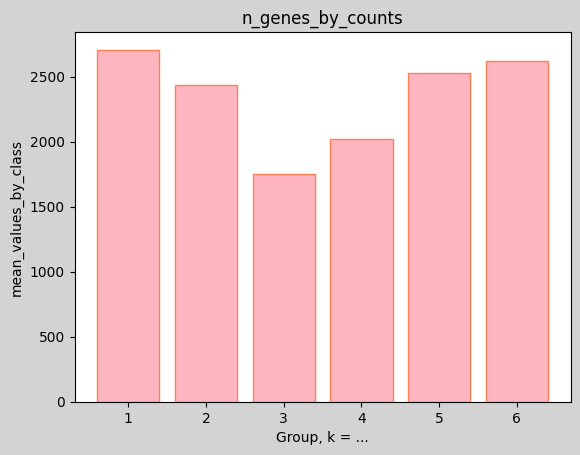

In [ ]:
import matplotlib.pyplot as plt

k_number = [1, 2, 3, 4, 5, 6]
plt.figure(facecolor='lightgrey')
plt.xlabel('Group, k = ...')
plt.ylabel('mean_values_by_class')
plt.title('n_genes_by_counts')
plt.bar(k_number, mean_values_by_class,
        color = 'lightpink', edgecolor = 'coral')
plt.show()

> **total_counts**

In [ ]:
adata.obs['total_counts'][0]

1982.0

In [ ]:
import numpy as np

mean_values_by_class = []

for i in range(0, 6):
  values = []
  for cell in range(0, len(labels)): # пробежим по столбцу в матрице X (по клеткам)
    if labels[cell] == i: # если строка в матрице относится к i-ому классу, то
      values.append(adata.obs['total_counts'][cell]) # добавляем одно значение в values
  mean = np.mean(values) # считаем среднее по всем значениям одного класса
  mean_values_by_class.append(mean) # добавляем в список среднее по классу.

mean_values_by_class

[9532.296, 8154.1353, 6686.1904, 5537.049, 9534.897, 10226.849]

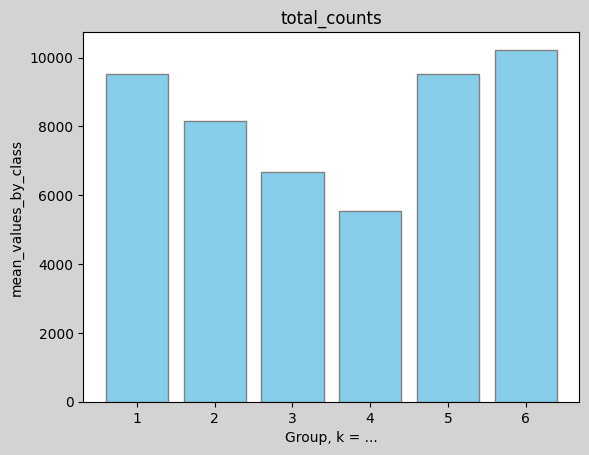

In [ ]:
import matplotlib.pyplot as plt

k_number = [1, 2, 3, 4, 5, 6]
plt.figure(facecolor='lightgrey')
plt.xlabel('Group, k = ...')
plt.ylabel('mean_values_by_class')
plt.title('total_counts')
plt.bar(k_number, mean_values_by_class,
        color = 'skyblue', edgecolor = 'grey')
plt.show()

> **total_counts_mt**

In [ ]:
adata.obs['total_counts_mt'][0]

24.0

In [ ]:
import numpy as np

mean_values_by_class = []

for i in range(0, 6):
  values = []
  for cell in range(0, len(labels)): # пробежим по столбцу в матрице X (по клеткам)
    if labels[cell] == i: # если строка в матрице относится к i-ому классу, то
      values.append(adata.obs['total_counts_mt'][cell]) # добавляем одно значение в values
  mean = np.mean(values) # считаем среднее по всем значениям одного класса
  mean_values_by_class.append(mean) # добавляем в список среднее по классу.

mean_values_by_class

[344.4591, 274.9189, 229.34525, 228.02438, 299.8457, 408.57574]

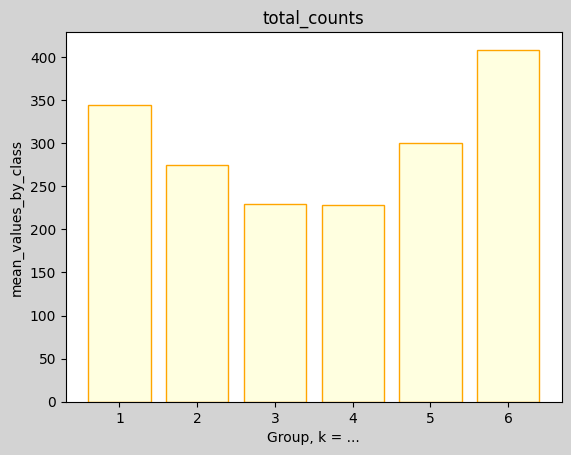

In [ ]:
import matplotlib.pyplot as plt

k_number = [1, 2, 3, 4, 5, 6]
plt.figure(facecolor='lightgrey')
plt.xlabel('Group, k = ...')
plt.ylabel('mean_values_by_class')
plt.title('total_counts')
plt.bar(k_number, mean_values_by_class,
        color = 'lightyellow', edgecolor = 'orange')
plt.show()

##### **Step 2. Выводы**

> При количестве классов 6 произошло нормальное разделение на классы. Аутлайеров нет. По графикам это видим так: нет каких-то экстремально отличающихся столбцов.

#### [1] Visualize `10` top expressed genes in each cluster. To do this, make use of:
1. `sc.tl.rank_genes_groups` to rank genes for characterizing groups (cluster labels).
2. `sc.pl.rank_genes_groups` to plot ranking of genes for each cluster.
3. `sc.pl.rank_genes_groups_heatmap` to plot ranking of genes using heatmap plot.\
Instead of the heatmap, you might want to use some other visualization that you find most fitting. You can use [this tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/plotting/core.html) to find more info about scanpy plotting functions.

##### **Step 1. sc.tl.rank_genes_groups**

In [ ]:
adata.obs['K-means (6)']

AAAGGATCAGGAATAT-1    2
AAAGGATTCGCAGATT-1    3
AAAGGTATCCAAGCAT-1    3
AAAGTCCTCTGAGAAA-1    2
AACAAAGAGAACAAGG-1    4
                     ..
TTTCCTCCACGCTATA-1    2
TTTGACTAGATGCTTC-1    1
TTTGGTTTCAGTAGGG-1    4
TTTGTTGAGATCGACG-1    0
TTTGTTGTCGCTACAA-1    2
Name: K-means (6), Length: 691, dtype: category
Categories (6, int64): [0, 1, 2, 3, 4, 5]

In [ ]:
import scanpy as sc

sc.tl.rank_genes_groups(adata, groupby = 'K-means (6)', method='t-test')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: RuntimeWarning: invalid value encountered in log2
  self.stats[group_name, 'logfoldchanges'] = np.log2(
/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:422: 

In [ ]:
adata.uns['rank_genes_groups']

{'params': {'groupby': 'K-means (6)',
  'reference': 'rest',
  'method': 't-test',
  'use_raw': False,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('FCN1', 'SKAP1', 'LRRK2', 'NKG7', 'BCL11B', 'AFF3'),
            ('CST3', 'CD3D', 'RBM47', 'GZMA', 'IL7R', 'HLA-DQA1'),
            ('FGL2', 'BCL11B', 'FCGR3B', 'CCL5', 'TRAC', 'BCL11A'), ...,
            ('CD247', 'CALHM6', 'TNIK', 'FPR2', 'TYROBP', 'PRKCQ'),
            ('SKAP1', 'FCN1', 'ITK', 'HCK', 'RAB31', 'CD3D'),
            ('SYNE2', 'SYK', 'TRBC2', 'SLC8A1', 'HLA-DRB1', 'SLCO3A1')],
           dtype=[('0', 'O'), ('1', 'O'), ('2', 'O'), ('3', 'O'), ('4', 'O'), ('5', 'O')]),
 'scores': rec.array([( 43.609165,  17.558033,  23.863459,  14.484188,  30.487806,  41.410686),
            ( 42.951748,  15.958376,  22.188536,  11.094512,  30.080578,  21.930693),
            ( 38.55068 ,  15.49512 ,  22.142643,  10.785788,  29.806738,  20.77238 ),
            ...,
            (-26.769278, -18.189163, -18.7500

##### **Step 2. sc.pl.rank_genes_groups**

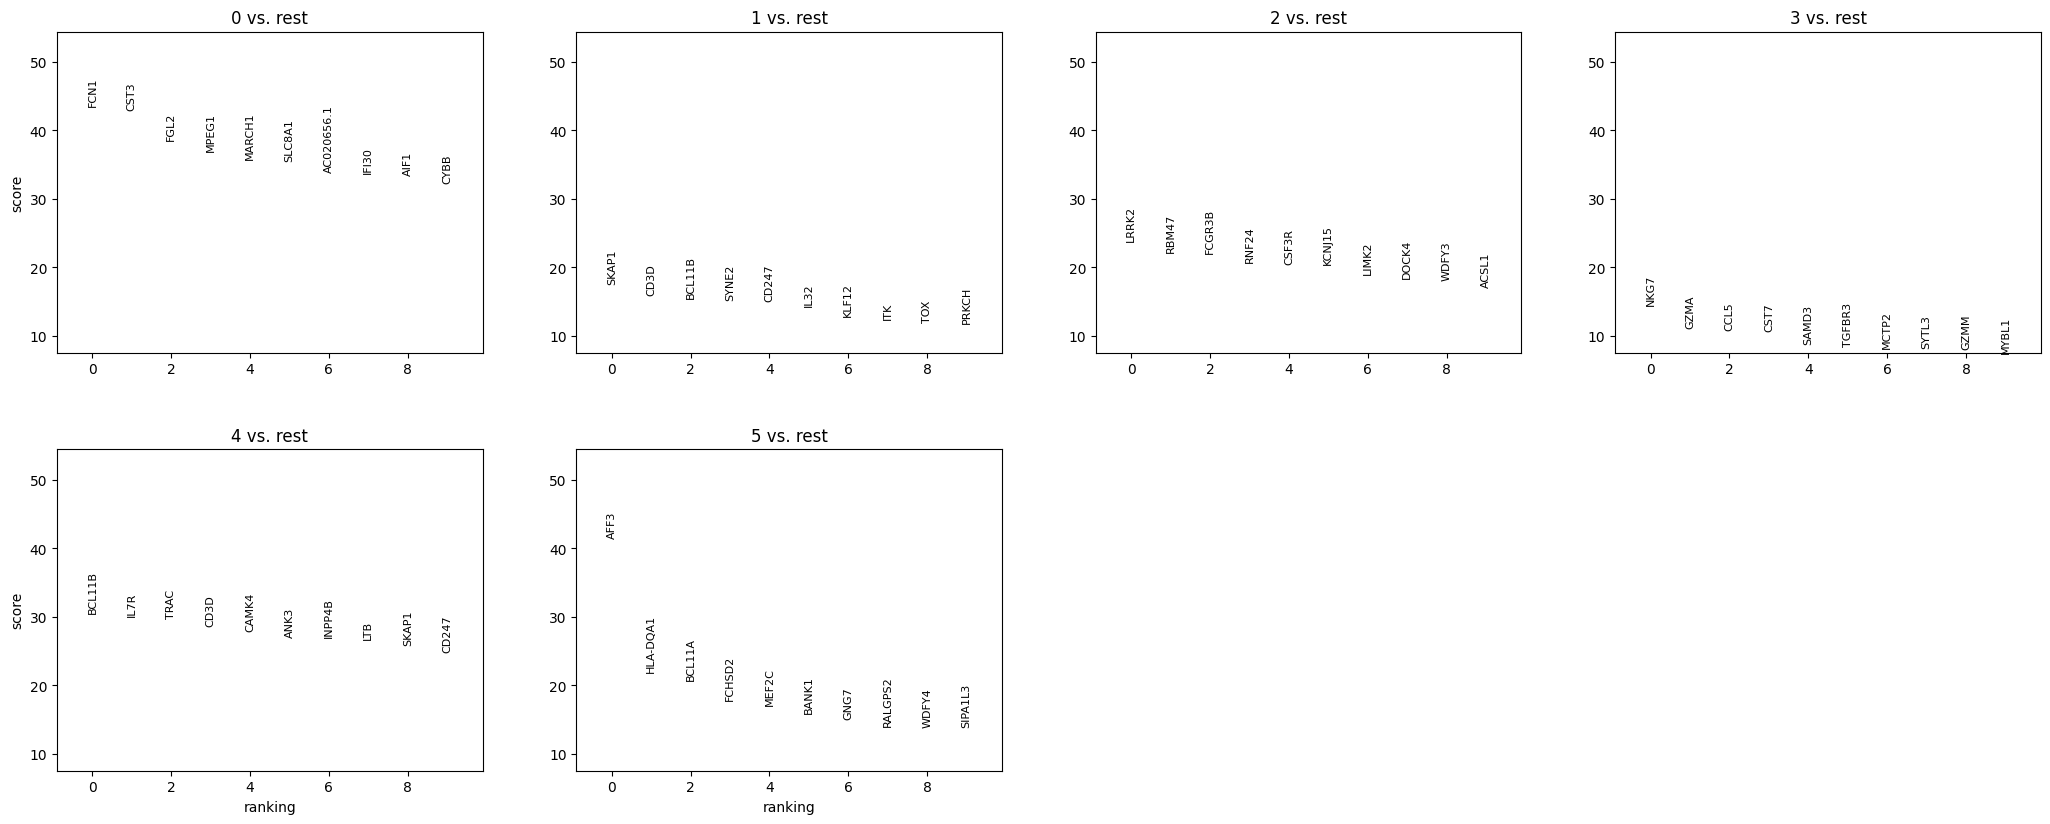

In [ ]:
# Visualize the top 10 genes for each cluster (6 clusters)
sc.pl.rank_genes_groups(adata, n_genes=10)

##### **Step 3. sc.pl.rank_genes_groups**

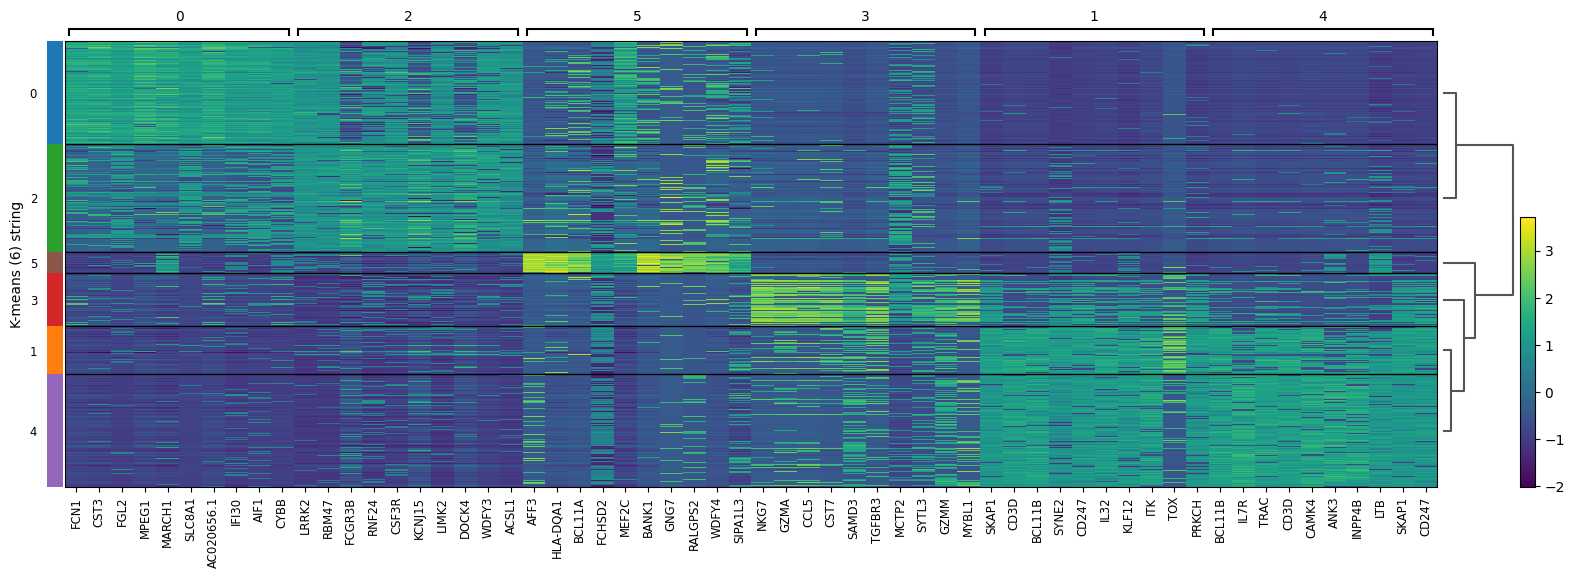

In [ ]:
adata.obs['K-means (6) string'] = adata.obs['K-means (6)'].astype(str) # просил строковый тип данных, поэтому я создала новую колонку
sc.pl.rank_genes_groups_heatmap(adata, groupby='K-means (6) string', n_genes=10, show_gene_labels = True)

#### [1.5] Do one of the following:
  * Either provide formal algorithm and implementation of K-means with random initialization by hand, describe results, and compare them to the sklearn implementation.
  * Or do the same for PCA.\
    *Note that completing both assignments does NOT result in [3.0] points.*

Источник информации:

> https://www.geeksforgeeks.org/k-means-clustering-introduction/

##### **Step 1. Описание работы алгоритма словами**

В пространство точек (данных) в рандомные координаты помещется k центроидов, которые затем станут серединами кластеров.

Далее рассчитывается расстояние (например, евклидово) от центроидов до соседних с ними точек.

После этого точки объединяются в кластеры, а центроиды перемещаются в центр кластера.

Итерации с рассчетом расстояний и помещением центроида в центр кластера повторяются до тех пор, пока:

а) Не закончится число заданных итераций (например, 1000)

б) Центроиды не перестанут двигаться или изменение координат центроидов будет пренебрежимо мало.

##### **Step 2. Описание работы алгоритма кодом**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

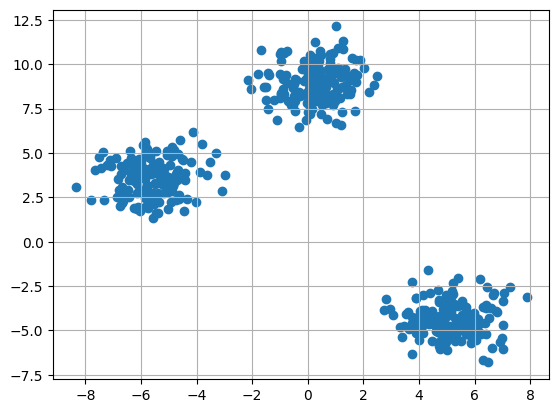

In [ ]:
X,y = make_blobs(n_samples = 500,n_features = 2,centers = 3,random_state = 23)

fig = plt.figure(0)
plt.grid(True)
plt.scatter(X[:,0],X[:,1])
plt.show()

In [ ]:
k = 3

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([0.06919154, 1.78785042]), 'points': []},
 1: {'center': array([ 1.06183904, -0.87041662]), 'points': []},
 2: {'center': array([-1.11581855,  0.74488834]), 'points': []}}

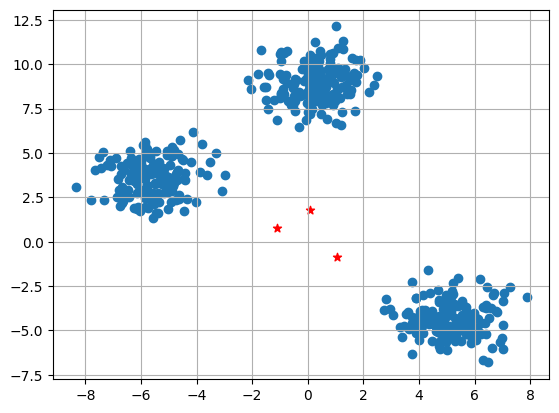

In [ ]:
plt.scatter(X[:,0],X[:,1])
plt.grid(True)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '*',c = 'red')
plt.show()

In [ ]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [ ]:
#Implementing E step
def assign_clusters(X, clusters):
    for idx in range(X.shape[0]):
        dist = []

        curr_x = X[idx]

        for i in range(k):
            dis = distance(curr_x,clusters[i]['center'])
            dist.append(dis)
        curr_cluster = np.argmin(dist)
        clusters[curr_cluster]['points'].append(curr_x)
    return clusters

#Implementing the M-Step
def update_clusters(X, clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center

            clusters[i]['points'] = []
    return clusters

In [ ]:
def pred_cluster(X, clusters):
    pred = []
    for i in range(X.shape[0]):
        dist = []
        for j in range(k):
            dist.append(distance(X[i],clusters[j]['center']))
        pred.append(np.argmin(dist))
    return pred

In [ ]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

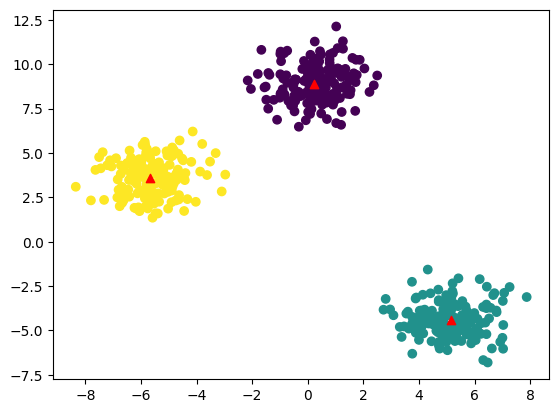

In [ ]:
plt.scatter(X[:,0],X[:,1],c = pred)
for i in clusters:
    center = clusters[i]['center']
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.show()

##### **Step 3. Тест алгоритма на adata**

> Здесь я не буду визуализировать, потому что не делала понижение разерности. Предсказания классов будут храниться в переменной **pred**.

In [ ]:
adata

AnnData object with n_obs × n_vars = 691 × 1822
    obs: 'n_genes_by_counts', 'total_counts', 'n_genes', 'total_counts_mt', 'pct_counts_mt', 'K-means', 'Agglomerative Clustering', 'leiden', 'K-means (5)', 'K-means (10)', 'K-means (15)', 'K-means (20)', 'K-means (25)', 'K-means (2)', 'K-means (3)', 'K-means (4)', 'K-means (6)', 'K-means (7)', 'K-means (8)', 'K-means (9)', 'leiden (0.1)', 'leiden (0.3)', 'leiden (0.5)', 'leiden (0.7)', 'leiden (0.9)', 'leiden (1.1)', 'leiden (1.3)', 'leiden (1.5)', 'leiden (1.7)', 'leiden (1.9)', 'K-means (6) string'
    var: 'gene_ids', 'feature_types', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'neighbors', 'umap', 'tsne', 'leiden', 'leiden_colors', 'K-means_colors', 'Agglomerative Clustering_colors', 'K-means (5)_colors', 'K-means (10)_colors', 'K-means (15)_colors', 'K-means (20)_colors', 'K-m

In [ ]:
import anndata

X_df = adata.to_df()
X_df.head()

SKI    CEP104     VAMP3      H6PD  SLC25A33  \
AAAGGATCAGGAATAT-1 -0.334564 -0.181138  2.592294 -0.267782  0.018887   
AAAGGATTCGCAGATT-1 -0.378200 -0.396284  1.716311 -0.333476 -0.513245   
AAAGGTATCCAAGCAT-1 -0.355919 -0.329309 -0.478004 -0.306966 -0.356239   
AAAGTCCTCTGAGAAA-1 -0.364192 -0.180510 -0.392400 -0.288322  0.050026   
AACAAAGAGAACAAGG-1 -0.506908 -0.501280 -0.757540 -0.440374 -0.666140   

                        RBP7     UBE4B     KIF1B       PGD   EXOSC10  ...  \
AAAGGATCAGGAATAT-1 -0.118397 -0.528586  1.491238 -0.587312 -0.084746  ...   
AAAGGATTCGCAGATT-1 -0.460228 -0.818973 -0.817190 -0.778100 -0.410217  ...   
AAAGGTATCCAAGCAT-1 -0.359784 -0.721400 -0.865308 -0.713734 -0.305696  ...   
AAAGTCCTCTGAGAAA-1 -0.096978  1.911206 -1.062564 -0.603770 -0.094750  ...   
AACAAAGAGAACAAGG-1 -0.553332  0.714950  1.228266 -0.932634 -0.608598  ...   

                    RAP2C-AS1     MBNL3   FAM122C    ATP11C     MTMR1  \
AAAGGATCAGGAATAT-1  -0.156134 -0.068025 -0.242593 -0.302483 -0.349463   
AAAGGATTCGCAGATT-1  -0.457159 -0.498928 -0.377913 -0.591667  2.213751   
AAAGGTATCCAAGCAT-1   2.487168 -0.371169 -0.329182  1.835973 -0.490516   
AAAGTCCTCTGAGAAA-1  -0.129000 -0.044935  3.463456 -0.302787 -0.354729   
AACAAAGAGAACAAGG-1   1.982070  1.971806  2.144489 -0.736942  1.400682   

                       IRAK1      GAB3     BRCC3     TMLHE     VAMP7  
AAAGGATCAGGAATAT-1 -0.020920 -0.295939 -0.142919 -0.311304 -0.131427  
AAAGGATTCGCAGATT-1  3.017325  2.206154 -0.479932 -0.497133  2.457553  
AAAGGTATCCAAGCAT-1 -0.266607 -0.487814 -0.377325 -0.434303 -0.351725  
AAAGTCCTCTGAGAAA-1 -0.033663 -0.298120 -0.134048  2.792454 -0.127121  
AACAAAGAGAACAAGG-1 -0.610296 -0.723226  1.944644 -0.649340 -0.593090  

[5 rows x 1822 columns]

In [ ]:
X = X_df.values

In [ ]:
print(X.shape, end = '\n\n')
print(X)

(691, 1822)

[[-0.33456445 -0.18113811  2.592294   ... -0.14291942 -0.31130445
  -0.13142662]
 [-0.37820032 -0.39628378  1.7163106  ... -0.47993195 -0.49713287
   2.457553  ]
 [-0.35591942 -0.32930875 -0.4780035  ... -0.37732488 -0.43430325
  -0.35172454]
 ...
 [-0.40437242  2.987157   -0.57884115 ... -0.48217452 -0.5163581
  -0.45541635]
 [-0.33783528 -0.2779636   2.432886   ... -0.2989289  -0.38556167
  -0.27659744]
 [-0.35162088 -0.18478076  2.5229187  ... -0.14430031 -0.32379642
  -0.13496691]]


In [ ]:
k = 6

clusters = {}
np.random.seed(23)

for idx in range(k):
    center = 2*(2*np.random.random((X.shape[1],))-1)
    points = []
    cluster = {
        'center' : center,
        'points' : []
    }

    clusters[idx] = cluster

clusters

{0: {'center': array([ 0.06919154,  1.78785042,  1.06183904, ..., -1.83766455,
         -1.45178659, -0.32068159]),
  'points': []},
 1: {'center': array([-0.64459134, -0.27145367, -1.93183658, ..., -1.30699733,
          0.52807669, -0.00438774]),
  'points': []},
 2: {'center': array([ 0.74818865, -0.46507184, -0.2039066 , ..., -0.082952  ,
         -1.16897503, -1.98637545]),
  'points': []},
 3: {'center': array([ 1.02075975, -0.71670135,  0.28530718, ...,  0.83801157,
          1.38576385, -0.56717375]),
  'points': []},
 4: {'center': array([ 1.56894118, -1.71111475, -1.67645276, ..., -0.67496923,
          0.14751504,  1.31820202]),
  'points': []},
 5: {'center': array([-0.69554659,  0.74607077, -1.19139856, ..., -1.53678788,
         -1.38126536, -0.89247762]),
  'points': []}}

In [ ]:
clusters = assign_clusters(X,clusters)
clusters = update_clusters(X,clusters)
pred = pred_cluster(X,clusters)

In [ ]:
print(pred)

[5, 2, 2, 1, 2, 1, 2, 2, 2, 2, 3, 3, 3, 2, 1, 1, 3, 3, 2, 5, 2, 2, 3, 1, 0, 2, 3, 2, 3, 2, 1, 2, 2, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 3, 1, 2, 5, 2, 5, 3, 2, 2, 1, 2, 2, 3, 2, 3, 3, 2, 3, 3, 2, 5, 2, 3, 1, 2, 1, 3, 2, 2, 3, 3, 1, 3, 2, 3, 3, 2, 2, 3, 0, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 3, 3, 2, 1, 3, 3, 2, 2, 3, 2, 3, 3, 3, 5, 3, 1, 0, 5, 2, 3, 1, 1, 3, 2, 2, 1, 2, 3, 2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 5, 5, 2, 2, 2, 2, 2, 1, 3, 2, 1, 2, 1, 3, 2, 3, 3, 2, 3, 2, 1, 2, 1, 2, 3, 5, 2, 2, 3, 5, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 2, 2, 5, 1, 2, 1, 1, 2, 2, 1, 0, 2, 3, 2, 2, 2, 5, 2, 1, 2, 3, 3, 3, 5, 1, 2, 2, 3, 2, 4, 2, 2, 2, 3, 1, 2, 2, 1, 2, 3, 2, 2, 3, 2, 3, 1, 3, 2, 3, 2, 1, 2, 1, 5, 1, 2, 1, 3, 3, 2, 3, 2, 2, 5, 0, 2, 2, 3, 3, 1, 2, 3, 2, 2, 1, 2, 2, 3, 2, 3, 3, 3, 2, 3, 5, 2, 3, 2, 3, 3, 1, 5, 1, 2, 3, 3, 1, 1, 2, 2, 2, 3, 2, 5, 2, 2, 3, 3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 1, 2, 4, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 0, 5, 5, 3, 3, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 

##### **Step 4. Сравнение результатов кода с sklearn**

In [ ]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 6, random_state = 2)
km.fit(X)
pred_sklearn = km.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
print(pred_sklearn)

[5 1 1 5 3 5 3 1 3 3 0 0 0 1 5 0 0 0 3 5 3 3 0 5 1 3 0 1 5 3 5 1 1 0 0 0 0
 1 3 4 1 5 1 2 5 4 1 3 4 0 3 3 5 4 3 0 1 0 0 1 0 0 3 5 3 0 5 1 5 5 3 3 0 0
 5 0 1 5 0 3 3 5 5 3 3 2 1 3 0 3 1 1 0 0 0 1 0 0 0 3 3 5 1 0 0 2 2 0 5 5 5
 3 0 5 5 5 1 3 5 3 0 3 5 0 1 2 3 0 1 1 0 5 5 4 3 3 3 1 3 5 5 3 4 1 5 5 3 0
 0 3 0 3 4 3 5 3 5 4 4 3 0 2 2 0 3 0 0 0 0 0 1 5 3 3 5 5 3 5 5 3 3 5 5 1 0
 1 1 1 4 1 5 3 0 0 5 4 5 3 3 0 3 5 1 1 3 0 5 4 1 5 3 5 3 3 0 1 0 5 0 3 0 3
 5 3 5 5 5 4 5 0 0 3 0 3 1 5 5 3 1 0 2 5 1 0 1 3 5 3 3 0 4 0 0 0 3 0 5 3 0
 3 0 0 5 4 5 3 0 5 5 5 1 1 3 2 1 5 3 3 0 0 0 1 0 0 1 1 3 4 0 3 3 4 3 1 0 5
 0 5 0 3 5 3 4 1 5 3 0 3 3 3 4 1 3 3 3 5 0 1 1 5 5 2 5 3 3 0 3 3 2 1 3 5 3
 3 2 1 5 5 4 0 3 0 0 1 1 5 5 5 5 3 3 4 1 1 3 1 4 3 0 3 4 3 0 0 4 3 1 1 1 5
 3 0 0 0 5 3 5 3 0 3 1 5 0 4 1 3 1 3 2 5 0 5 1 3 0 3 3 0 4 3 1 1 4 1 3 1 0
 3 0 3 1 3 3 5 0 0 0 4 5 0 0 0 4 4 0 4 1 3 5 1 5 0 5 4 3 3 3 3 0 5 1 4 5 2
 3 0 0 3 0 3 0 3 3 5 0 0 0 3 4 5 4 5 3 3 1 2 5 0 3 0 0 1 3 1 3 3 3 5 0 1 1
 1 5 0 5 3 5 5 1 0 2 3 5 

In [ ]:
classes = []

for k in range(0, 6):
  value = []
  for i in range(0, len(pred)):
    if pred[i] == k:
      value.append(i) # добавляет в value номер клетки, если она принадлежит к классу k
  classes.append(value)

In [ ]:
print(classes)

[[24, 82, 109, 182, 236, 318, 364, 369, 413, 553, 628], [3, 5, 14, 15, 23, 30, 41, 44, 52, 66, 68, 74, 96, 108, 113, 114, 118, 139, 142, 144, 152, 154, 175, 177, 178, 181, 190, 196, 206, 209, 217, 222, 224, 226, 228, 241, 246, 262, 264, 268, 269, 295, 297, 300, 304, 315, 331, 351, 356, 374, 398, 433, 439, 453, 460, 466, 477, 484, 494, 495, 506, 508, 510, 513, 520, 532, 535, 538, 550, 591, 594, 615, 616, 642, 647, 658, 668, 676], [1, 2, 4, 6, 7, 8, 9, 13, 18, 20, 21, 25, 27, 29, 31, 32, 37, 38, 39, 40, 42, 45, 47, 50, 51, 53, 54, 56, 59, 62, 64, 67, 70, 71, 76, 79, 80, 83, 84, 86, 87, 89, 90, 91, 95, 99, 100, 102, 111, 116, 117, 119, 121, 124, 126, 128, 129, 134, 135, 136, 137, 138, 141, 143, 146, 149, 151, 153, 155, 158, 159, 164, 170, 172, 173, 176, 179, 180, 183, 185, 186, 187, 189, 191, 197, 198, 200, 202, 203, 204, 207, 208, 210, 212, 213, 215, 219, 221, 223, 227, 231, 233, 234, 237, 238, 242, 244, 245, 247, 248, 250, 254, 257, 259, 265, 270, 271, 272, 274, 276, 277, 281, 284, 285,

In [ ]:
classes_sklearn = []

for k in range(0, 6):
  value = []
  for i in range(0, len(pred_sklearn)):
    if pred_sklearn[i] == k:
      value.append(i) # добавляет в value номер клетки, если она принадлежит к классу k
  classes_sklearn.append(value)

In [ ]:
print(classes_sklearn)

[[10, 11, 12, 15, 16, 17, 22, 26, 33, 34, 35, 36, 49, 55, 57, 58, 60, 61, 65, 72, 73, 75, 78, 88, 92, 93, 94, 96, 97, 98, 103, 104, 107, 112, 120, 123, 127, 130, 147, 148, 150, 160, 163, 165, 166, 167, 168, 169, 184, 192, 193, 199, 205, 214, 216, 218, 220, 229, 230, 232, 239, 243, 249, 251, 252, 253, 255, 258, 260, 261, 266, 278, 279, 280, 282, 283, 288, 294, 296, 298, 306, 316, 325, 339, 341, 342, 358, 362, 363, 371, 372, 373, 378, 382, 390, 394, 397, 406, 408, 414, 415, 416, 419, 420, 421, 424, 431, 438, 445, 446, 448, 450, 454, 455, 456, 467, 469, 470, 478, 483, 489, 503, 514, 518, 523, 524, 525, 527, 529, 530, 531, 534, 536, 540, 557, 559, 567, 568, 571, 579, 582, 583, 586, 587, 593, 599, 601, 611, 617, 619, 621, 622, 630, 631, 635, 639, 645, 648, 655, 657, 659, 660, 661, 662, 664, 665, 669, 670, 680, 689], [1, 2, 7, 13, 24, 27, 31, 32, 37, 40, 42, 46, 56, 59, 67, 76, 86, 90, 91, 95, 102, 116, 124, 128, 129, 137, 143, 170, 183, 185, 186, 187, 189, 202, 203, 208, 215, 234, 238, 242,

In [ ]:
# возвращаю переменной ее функцию
len = __builtins__.len

In [ ]:
common_cells = []

for i in range(0, 6):
  length = 0
  for j in range(0, 6):
    common_cells = [cell for cell in classes[i] if cell in classes_sklearn[j]]
    if len(common_cells) > length:
      length = len(common_cells)
      index_classes = i
      index_classes_sklearn = j
  print(f'Число совпадающих клеток = {length}:\tclasses (k={index_classes}), classes_sklearn (k={index_classes_sklearn})')

Число совпадающих клеток = 8:	classes (k=0), classes_sklearn (k=5)
Число совпадающих клеток = 68:	classes (k=1), classes_sklearn (k=5)
Число совпадающих клеток = 189:	classes (k=2), classes_sklearn (k=3)
Число совпадающих клеток = 166:	classes (k=3), classes_sklearn (k=0)
Число совпадающих клеток = 2:	classes (k=4), classes_sklearn (k=4)
Число совпадающих клеток = 31:	classes (k=5), classes_sklearn (k=5)


> Число совпадающих клеток = **189**:	classes (k=2), classes_sklearn (k=3)

In [ ]:
print(len(classes[2]))
print(len(classes_sklearn[3]))

318
189


> Число совпадающих клеток = **166**:	classes (k=3), classes_sklearn (k=0)

In [ ]:
print(len(classes[3]))
print(len(classes_sklearn[0]))

231
170


**Вывод:**

> При числе классов = шесть (6) более-менее совпадают предсказания двух из шести классов. То есть в эти два класса попадают одни и те же клетки.

> Считаю, что с пивком потянет.

> Я старалась.

> Вероятно, такой результат получился из-за недостаточного количества итераций перерасчета расстояния в алгоритме 1 (который не sklearn).

# Extra points [1.5]



* [1] Choose 3 clusters of interest and try to make a guess about their cell type based on the top-expressed genes. For example, look for information on whether such high expression of a certain gene is typical of some cell type.

\- nothing here

* [0.5]  You worked hard to get here, and we hope you learned something new! To get these bonus points, please describe your impressions of this course, constructive suggestions, and attach a funny meme (about your favourite field, like ML or molecular biology) \
 **Please note that if the meme is not funny, no points will be awarded!**

**Отзыв о курсе и предложения**

Лекции мне не очень понравились. Потому что я ничего не понимала - с нуля материал не воспринимается. Ожидала более четкой структуры и в лекциях, и в презентациях к лекциям, где как-то не понятно, где заголовок, где что и куда смотреть. Может, конечно, у меня когнитивные проблемы. Но очень хочется верить, что их нет. Не понравились обсуждения статей на лекциях - показалось не очень продуктивным времяпрепровождением.

После прохождения курса по ML на Stepik я начала что-то понимать и на лекциях, и на семинарах.

Семинары, наоборот, очень понравились. Сначала я не понимала ни-че-го. Но потом как поняла!!! Конспектировала то, что говорил преподаватель (зовут Кирилл) и возвращалась к конспектам - материал полезный. Основные идеи курса я вынесла именно из семинаров. Хотелось бы больше времени курса по ML уделить именно практической части, потому что она сильная и интересная. Вообще хотелось бы на год ML растянуть. Мне не хватило времени въехать и осознать. Также мне было сложно справляться с домашками, но что-то получалось, и я этому очень рада. Возможно, стоит каждую домашку поделить на маленькие кусочки и давать их постепенно, чтобы не было атаческой паники каждый раз, когда открываешь ДЗ. Хотя вот последняя домашка заставила меня поверить в себя. По крайней мере, до момента выставления баллов за неё.

Кирилл Игоревич умный, красивый, интересный, чудесный преподаватель. Спасибо за курс. Спасибо за помощь в усвоении материала и за ясные ответы на мои вопросы. Мне радостно, что я что-то поняла. Всё было новым и полезным. Го в клуб-клуб после экзамена


**Мем**

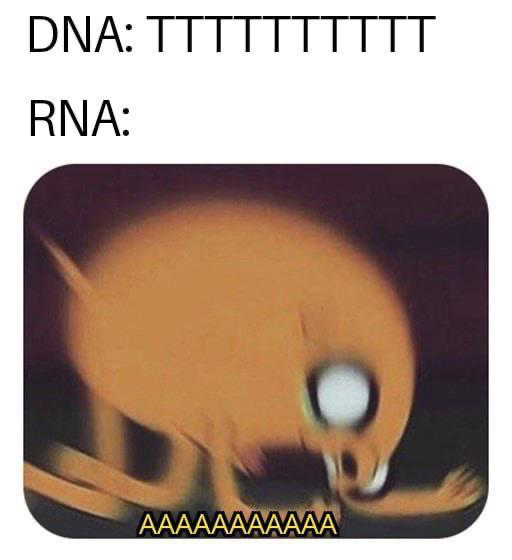

Это строчки из моей любимой повести. Мне смешно!

>>"Ты там все пудрилась, час лишний провороня,
>>
>>И вот за нами вслед ужасная погоня...
>>
>>Как хочешь с ней разделывайся ты,
>>
>>А я бегу в кусты."